<a href="https://colab.research.google.com/github/riponalmamun/WITH-BACKGROUND-Sandfly/blob/main/WITH_BACKGROUND.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import zipfile
import os

zip_path = '/content/Genitalia_Balanced_Original.zip'
extract_dir = '/content/Genitalia_Balanced_Original_DATASET'

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# List the contents
for root, dirs, files in os.walk(extract_dir):
    print(f"📁 Folder: {root}")
    for file in files:
        print(f"  📄 {file}")
    break  # Remove this if you want to list all subfolders too

📁 Folder: /content/Genitalia_Balanced_Original_DATASET


🧾 Classes found: ['Ph_alexandri_female', 'Ph_alexandri_male', 'Ph_papatasi_female', 'Ph_papatasi_male', 'Ph_sergenti_female', 'Ph_sergenti_male']

📊 Image count per class:
  Ph_alexandri_female: 269 images
  Ph_alexandri_male: 269 images
  Ph_papatasi_female: 269 images
  Ph_papatasi_male: 269 images
  Ph_sergenti_female: 269 images
  Ph_sergenti_male: 269 images


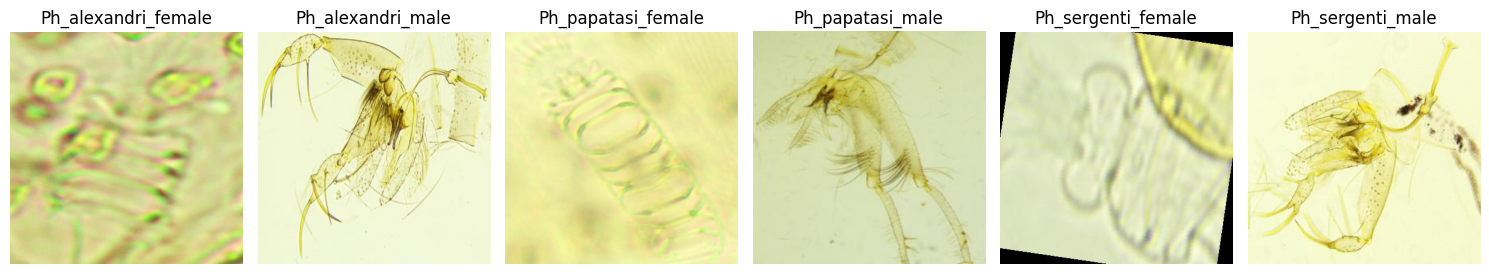

In [4]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Set dataset directory
data_dir = '/content/Genitalia_Balanced_Original_DATASET/Genitalia_Balanced'

# List class folders
classes = sorted(os.listdir(data_dir))
print("🧾 Classes found:", classes)

# Count images per class
class_counts = {}
for cls in classes:
    cls_path = os.path.join(data_dir, cls)
    if os.path.isdir(cls_path):
        count = len([f for f in os.listdir(cls_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])
        class_counts[cls] = count

print("\n📊 Image count per class:")
for cls, count in class_counts.items():
    print(f"  {cls}: {count} images")

# Show a sample image from each class
fig, axes = plt.subplots(1, len(classes), figsize=(15, 5))
for i, cls in enumerate(classes):
    cls_path = os.path.join(data_dir, cls)
    img_files = [f for f in os.listdir(cls_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    if img_files:
        img = mpimg.imread(os.path.join(cls_path, img_files[0]))
        axes[i].imshow(img)
        axes[i].axis('off')
        axes[i].set_title(cls)

plt.tight_layout()
plt.show()


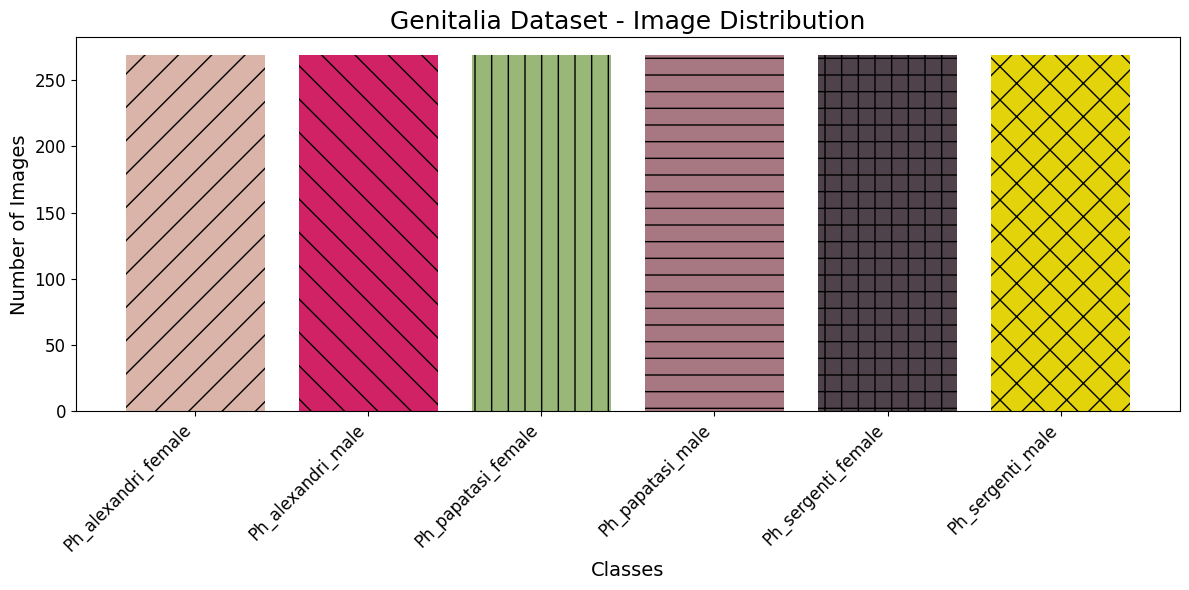


📊 Total images: 1614
📂 Image count per class:

              Class  Number of Images
Ph_alexandri_female               269
  Ph_alexandri_male               269
 Ph_papatasi_female               269
   Ph_papatasi_male               269
 Ph_sergenti_female               269
   Ph_sergenti_male               269


In [5]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import random
from collections import defaultdict

# Define dataset path
genitalia_path = '/content/Genitalia_Balanced_Original_DATASET/Genitalia_Balanced'  # ✅ Adjust if needed

# Count images per class
image_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.tiff')
class_counts = defaultdict(int)
total_images = 0

for class_folder in os.listdir(genitalia_path):
    class_path = os.path.join(genitalia_path, class_folder)
    if os.path.isdir(class_path):
        image_files = [
            f for f in os.listdir(class_path)
            if f.lower().endswith(image_extensions)
        ]
        count = len(image_files)
        class_counts[class_folder] = count
        total_images += count

# Prepare data for plotting
categories = sorted(class_counts.keys())
image_counts = [class_counts[cls] for cls in categories]

# Plotting
plt.figure(figsize=(12, 6))
patterns = ["/", "\\", "|", "-", "+", "x", "o", "*"] * (len(categories) // 8 + 1)
colors = ["#" + ''.join(random.choices('0123456789ABCDEF', k=6)) for _ in categories]
bars = plt.bar(categories, image_counts, color=colors)

for bar, pattern in zip(bars, patterns):
    bar.set_hatch(pattern)

plt.title("Genitalia Dataset - Image Distribution", fontsize=18)
plt.xlabel("Classes", fontsize=14)
plt.ylabel("Number of Images", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Save the plot
save_path = os.path.join(genitalia_path, "Genitalia_Image_Distribution.png")
plt.savefig(save_path, format="png", dpi=600)
plt.show()

# Table output
df = pd.DataFrame({"Class": categories, "Number of Images": image_counts})
print(f"\n📊 Total images: {total_images}")
print("📂 Image count per class:\n")
print(df.to_string(index=False))


In [6]:
import shutil
import os
import random

# Define dataset source path
dataset_source = "/content/Genitalia_Balanced_Original_DATASET/Genitalia_Balanced"

# Define target paths for train, validation, and test sets
train_path = "/content/Genitalia_Balanced_Original_DATASET/Genitalia_Balanced/train"
val_path = "/content/Genitalia_Balanced_Original_DATASET/Genitalia_Balanced/val"
test_path = "/content/Genitalia_Balanced_Original_DATASET/Genitalia_Balanced/test"

# Create directories for train, validation, and test sets if they don't exist
for path in [train_path, val_path, test_path]:
    os.makedirs(path, exist_ok=True)

# Define the split ratios for train, validation, and test
split_ratios = {"train": 0.8, "val": 0.05, "test": 0.15}

# Iterate through each class folder (assuming class-wise folder structure in the dataset)
for class_folder in os.listdir(dataset_source):
    class_path = os.path.join(dataset_source, class_folder)

    # Process only directories (class folders)
    if os.path.isdir(class_path):
        # List only image files within the class folder
        images = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]

        # Shuffle the image filenames to randomize the split
        random.shuffle(images)

        # Calculate the number of images for each split
        train_split = int(len(images) * split_ratios["train"])
        val_split = int(len(images) * split_ratios["val"])
        test_split = len(images) - train_split - val_split

        # Split and copy images into respective directories
        for i, img in enumerate(images):
            src_img_path = os.path.join(class_path, img)

            # Determine the target folder based on the split
            if i < train_split:
                dest_folder = os.path.join(train_path, class_folder)
            elif i < train_split + val_split:
                dest_folder = os.path.join(val_path, class_folder)
            else:
                dest_folder = os.path.join(test_path, class_folder)

            # Ensure the target folder exists
            os.makedirs(dest_folder, exist_ok=True)

            # Define the full path for the destination image (with the image name included)
            dest_img_path = os.path.join(dest_folder, img)

            # Copy the image to the appropriate folder
            shutil.copy(src_img_path, dest_img_path)

print("✅ Dataset successfully split into train/val/test (80%/5%/15%)!")


✅ Dataset successfully split into train/val/test (80%/5%/15%)!


In [7]:
import os
from PIL import Image

dataset_dir = '/content/Genitalia_Balanced_Original_DATASET/Genitalia_Balanced'
for root, dirs, files in os.walk(dataset_dir):
    for file in files:
        try:
            img = Image.open(os.path.join(root, file))
            img.verify()  # Verify if it's a valid image
        except (IOError, SyntaxError) as e:
            print(f"Invalid image file: {file} in {root}")
def process_images(file_path):
    try:
        img = Image.open(file_path)
        img.verify()
        # Further image processing here
    except (IOError, SyntaxError) as e:
        print(f"Error loading image {file_path}: {e}")


In [8]:
import os
from PIL import Image

def check_and_remove_corrupted_images(directory):
    invalid_images = []
    for subdir, _, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(subdir, file)
            try:
                img = Image.open(file_path)
                img.verify()  # Verifies if the file is a valid image
            except (IOError, SyntaxError) as e:
                print(f"Skipping invalid image: {file_path}")
                invalid_images.append(file_path)
                os.remove(file_path)  # Optionally, delete the corrupted image
    return invalid_images

# Apply this function to your dataset
check_and_remove_corrupted_images(train_path)
check_and_remove_corrupted_images(val_path)
check_and_remove_corrupted_images(test_path)


[]

In [9]:
from tensorflow.keras.preprocessing.image import load_img

# Define IMG_SIZE here
IMG_SIZE = (224, 224)  # Example size, adjust as needed

# Custom function to safely load an image
def safe_load_img_from_directory(directory, target_size):
    valid_files = []
    for subdir, _, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(subdir, file)
            try:
                img = load_img(file_path, target_size=target_size)
                valid_files.append(file_path)
            except Exception as e:
                print(f"Skipping invalid image: {file_path}")
    return valid_files

# Example: Use this function to load valid files
valid_train_images = safe_load_img_from_directory(train_path, IMG_SIZE)
valid_val_images = safe_load_img_from_directory(val_path, IMG_SIZE)
valid_test_images = safe_load_img_from_directory(test_path, IMG_SIZE)

# Use the list of valid files for your data generators

Found 1290 images belonging to 6 classes.
Found 78 images belonging to 6 classes.
Found 246 images belonging to 6 classes.
82420632/82420632 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
74836368/74836368 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step

🚀 Training EfficientNetV2S_CBAM for 20 epochs


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4829 - loss: 1.4496
Epoch 1: val_loss improved from inf to 0.57164, saving model to best_model.h5


81/81 ━━━━━━━━━━━━━━━━━━━━ 277s 1s/step - accuracy: 0.4844 - loss: 1.4456 - val_accuracy: 0.7436 - val_loss: 0.5716 - learning_rate: 1.0000e-04
Epoch 2/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step - accuracy: 0.8187 - loss: 0.5162
Epoch 2: val_loss improved from 0.57164 to 0.26764, saving model to best_model.h5


81/81 ━━━━━━━━━━━━━━━━━━━━ 24s 296ms/step - accuracy: 0.8189 - loss: 0.5157 - val_accuracy: 0.9231 - val_loss: 0.2676 - learning_rate: 1.0000e-04
Epoch 3/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step - accuracy: 0.9231 - loss: 0.2847
Epoch 3: val_loss improved from 0.26764 to 0.22203, saving model to best_model.h5


81/81 ━━━━━━━━━━━━━━━━━━━━ 25s 311ms/step - accuracy: 0.9231 - loss: 0.2846 - val_accuracy: 0.9487 - val_loss: 0.2220 - learning_rate: 1.0000e-04
Epoch 4/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step - accuracy: 0.9248 - loss: 0.2421
Epoch 4: val_loss did not improve from 0.22203
81/81 ━━━━━━━━━━━━━━━━━━━━ 22s 272ms/step - accuracy: 0.9249 - loss: 0.2418 - val_accuracy: 0.9103 - val_loss: 0.3666 - learning_rate: 1.0000e-04
Epoch 5/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step - accuracy: 0.9452 - loss: 0.1806
Epoch 5: val_loss improved from 0.22203 to 0.10069, saving model to best_model.h5


81/81 ━━━━━━━━━━━━━━━━━━━━ 45s 326ms/step - accuracy: 0.9452 - loss: 0.1805 - val_accuracy: 0.9872 - val_loss: 0.1007 - learning_rate: 1.0000e-04
Epoch 6/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step - accuracy: 0.9590 - loss: 0.1529
Epoch 6: val_loss did not improve from 0.10069
81/81 ━━━━━━━━━━━━━━━━━━━━ 23s 276ms/step - accuracy: 0.9590 - loss: 0.1527 - val_accuracy: 0.9487 - val_loss: 0.1257 - learning_rate: 1.0000e-04
Epoch 7/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step - accuracy: 0.9561 - loss: 0.1208
Epoch 7: val_loss did not improve from 0.10069
81/81 ━━━━━━━━━━━━━━━━━━━━ 22s 276ms/step - accuracy: 0.9562 - loss: 0.1208 - val_accuracy: 0.9615 - val_loss: 0.1595 - learning_rate: 1.0000e-04
Epoch 8/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step - accuracy: 0.9794 - loss: 0.0808
Epoch 8: val_loss improved from 0.10069 to 0.05439, saving model to best_model.h5


81/81 ━━━━━━━━━━━━━━━━━━━━ 28s 343ms/step - accuracy: 0.9793 - loss: 0.0810 - val_accuracy: 1.0000 - val_loss: 0.0544 - learning_rate: 1.0000e-04
Epoch 9/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step - accuracy: 0.9703 - loss: 0.0968
Epoch 9: val_loss did not improve from 0.05439
81/81 ━━━━━━━━━━━━━━━━━━━━ 23s 277ms/step - accuracy: 0.9703 - loss: 0.0968 - val_accuracy: 0.9615 - val_loss: 0.1107 - learning_rate: 1.0000e-04
Epoch 10/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step - accuracy: 0.9820 - loss: 0.0772
Epoch 10: val_loss did not improve from 0.05439
81/81 ━━━━━━━━━━━━━━━━━━━━ 22s 276ms/step - accuracy: 0.9820 - loss: 0.0772 - val_accuracy: 0.9359 - val_loss: 0.1976 - learning_rate: 1.0000e-04
Epoch 11/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step - accuracy: 0.9824 - loss: 0.0776
Epoch 11: val_loss improved from 0.05439 to 0.03535, saving model to best_model.h5


81/81 ━━━━━━━━━━━━━━━━━━━━ 29s 356ms/step - accuracy: 0.9824 - loss: 0.0776 - val_accuracy: 0.9872 - val_loss: 0.0353 - learning_rate: 1.0000e-04
Epoch 12/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step - accuracy: 0.9842 - loss: 0.0609
Epoch 12: val_loss did not improve from 0.03535
81/81 ━━━━━━━━━━━━━━━━━━━━ 22s 275ms/step - accuracy: 0.9842 - loss: 0.0610 - val_accuracy: 0.9615 - val_loss: 0.1410 - learning_rate: 1.0000e-04
Epoch 13/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step - accuracy: 0.9840 - loss: 0.0688
Epoch 13: val_loss did not improve from 0.03535
81/81 ━━━━━━━━━━━━━━━━━━━━ 23s 277ms/step - accuracy: 0.9839 - loss: 0.0689 - val_accuracy: 0.9744 - val_loss: 0.0794 - learning_rate: 1.0000e-04
Epoch 14/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step - accuracy: 0.9885 - loss: 0.0574
Epoch 14: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.

Epoch 14: val_loss did not improve from 0.03535
81/81 ━━━━━━━━━━━━━━━━━━━━ 22s 265ms/step - accuracy: 0.9884 - loss: 0.0575 - v

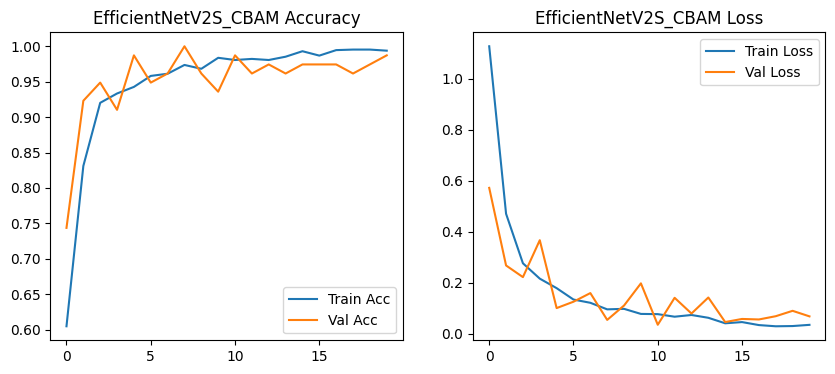

16/16 ━━━━━━━━━━━━━━━━━━━━ 22s 759ms/step
📊 Classification Report for EfficientNetV2S_CBAM
                     precision    recall  f1-score   support

Ph_alexandri_female       1.00      1.00      1.00        41
  Ph_alexandri_male       0.95      1.00      0.98        41
 Ph_papatasi_female       1.00      1.00      1.00        41
   Ph_papatasi_male       1.00      1.00      1.00        41
 Ph_sergenti_female       1.00      1.00      1.00        41
   Ph_sergenti_male       1.00      0.95      0.97        41

           accuracy                           0.99       246
          macro avg       0.99      0.99      0.99       246
       weighted avg       0.99      0.99      0.99       246



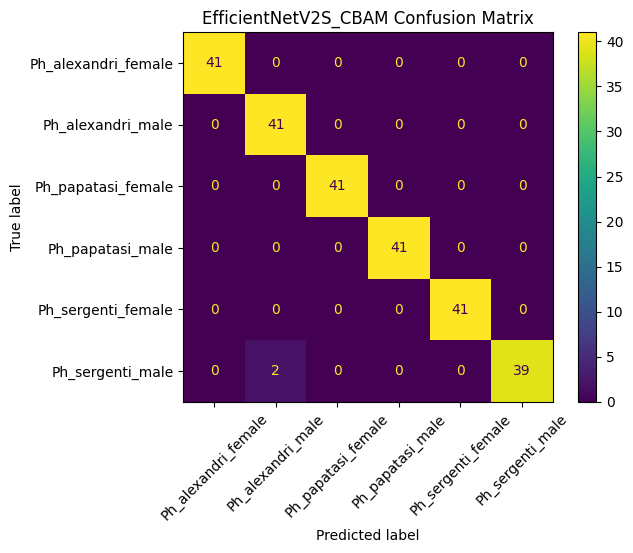


🚀 Training DenseNet201_SE for 20 epochs
Epoch 1/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.6014 - loss: 1.0164
Epoch 1: val_loss did not improve from 0.03535
81/81 ━━━━━━━━━━━━━━━━━━━━ 771s 4s/step - accuracy: 0.6033 - loss: 1.0122 - val_accuracy: 0.6154 - val_loss: 0.8827 - learning_rate: 1.0000e-04
Epoch 2/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step - accuracy: 0.9169 - loss: 0.2717
Epoch 2: val_loss did not improve from 0.03535
81/81 ━━━━━━━━━━━━━━━━━━━━ 26s 319ms/step - accuracy: 0.9169 - loss: 0.2717 - val_accuracy: 0.8718 - val_loss: 0.3960 - learning_rate: 1.0000e-04
Epoch 3/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step - accuracy: 0.9244 - loss: 0.2174
Epoch 3: val_loss did not improve from 0.03535
81/81 ━━━━━━━━━━━━━━━━━━━━ 26s 319ms/step - accuracy: 0.9246 - loss: 0.2171 - val_accuracy: 0.8846 - val_loss: 0.3324 - learning_rate: 1.0000e-04
Epoch 4/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step - accuracy: 0.9597 - loss: 0.1385
Epoch 4: val_loss did not improve from 0.

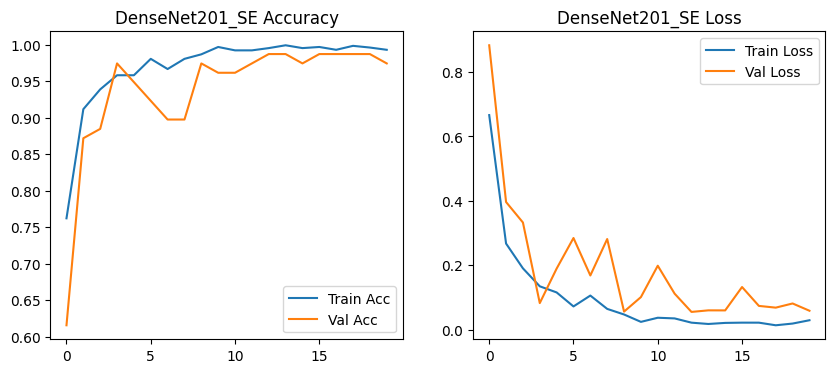

16/16 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step
📊 Classification Report for DenseNet201_SE
                     precision    recall  f1-score   support

Ph_alexandri_female       1.00      0.98      0.99        41
  Ph_alexandri_male       0.95      0.98      0.96        41
 Ph_papatasi_female       1.00      1.00      1.00        41
   Ph_papatasi_male       1.00      1.00      1.00        41
 Ph_sergenti_female       0.98      1.00      0.99        41
   Ph_sergenti_male       0.97      0.95      0.96        41

           accuracy                           0.98       246
          macro avg       0.98      0.98      0.98       246
       weighted avg       0.98      0.98      0.98       246



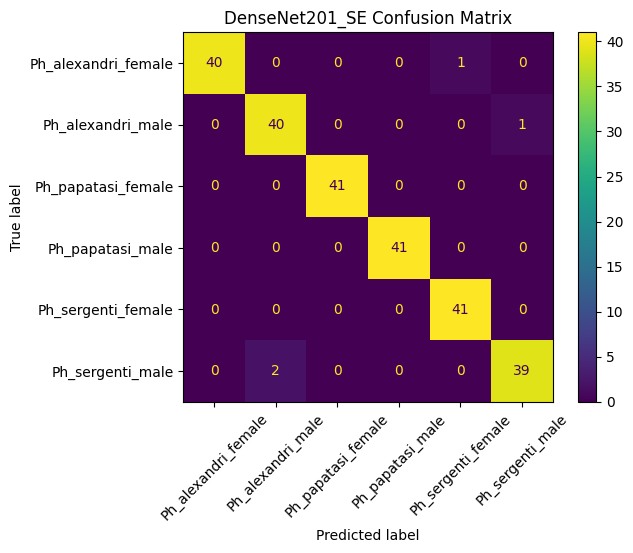


🚀 Training CustomCNN_CBAM for 20 epochs
Epoch 1/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step - accuracy: 0.1662 - loss: 1.8750
Epoch 1: val_loss did not improve from 0.03535
81/81 ━━━━━━━━━━━━━━━━━━━━ 43s 379ms/step - accuracy: 0.1661 - loss: 1.8746 - val_accuracy: 0.1667 - val_loss: 1.8006 - learning_rate: 0.0010
Epoch 2/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step - accuracy: 0.1650 - loss: 1.7979
Epoch 2: val_loss did not improve from 0.03535
81/81 ━━━━━━━━━━━━━━━━━━━━ 18s 216ms/step - accuracy: 0.1649 - loss: 1.7979 - val_accuracy: 0.1667 - val_loss: 1.7938 - learning_rate: 0.0010
Epoch 3/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step - accuracy: 0.1402 - loss: 1.7935
Epoch 3: val_loss did not improve from 0.03535
81/81 ━━━━━━━━━━━━━━━━━━━━ 17s 215ms/step - accuracy: 0.1404 - loss: 1.7935 - val_accuracy: 0.1667 - val_loss: 1.7924 - learning_rate: 0.0010
Epoch 4/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step - accuracy: 0.1672 - loss: 1.7923
Epoch 4: val_loss did not improve from 0.03535
8

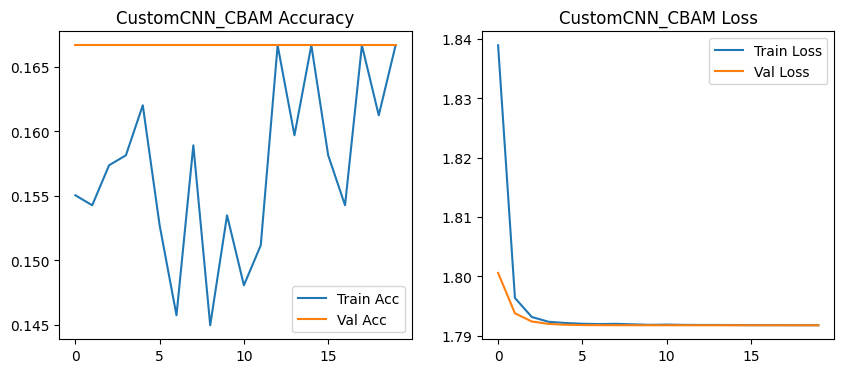

16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step
📊 Classification Report for CustomCNN_CBAM
                     precision    recall  f1-score   support

Ph_alexandri_female       0.00      0.00      0.00        41
  Ph_alexandri_male       0.17      1.00      0.29        41
 Ph_papatasi_female       0.00      0.00      0.00        41
   Ph_papatasi_male       0.00      0.00      0.00        41
 Ph_sergenti_female       0.00      0.00      0.00        41
   Ph_sergenti_male       0.00      0.00      0.00        41

           accuracy                           0.17       246
          macro avg       0.03      0.17      0.05       246
       weighted avg       0.03      0.17      0.05       246



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


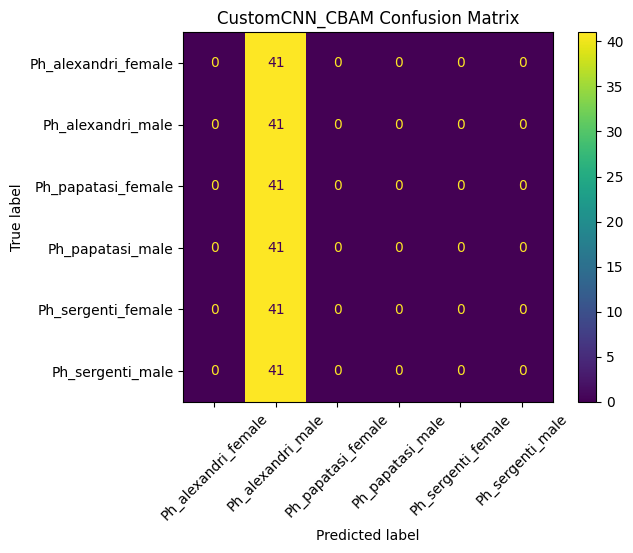


🚀 Training ResNet50 for 20 epochs
Epoch 1/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 550ms/step - accuracy: 0.5772 - loss: 1.1281
Epoch 1: val_loss did not improve from 0.03535
81/81 ━━━━━━━━━━━━━━━━━━━━ 112s 644ms/step - accuracy: 0.5787 - loss: 1.1238 - val_accuracy: 0.1667 - val_loss: 1.8954 - learning_rate: 1.0000e-04
Epoch 2/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step - accuracy: 0.8648 - loss: 0.3613
Epoch 2: val_loss did not improve from 0.03535
81/81 ━━━━━━━━━━━━━━━━━━━━ 25s 258ms/step - accuracy: 0.8649 - loss: 0.3610 - val_accuracy: 0.1667 - val_loss: 2.8433 - learning_rate: 1.0000e-04
Epoch 3/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step - accuracy: 0.9137 - loss: 0.2523
Epoch 3: val_loss did not improve from 0.03535
81/81 ━━━━━━━━━━━━━━━━━━━━ 22s 270ms/step - accuracy: 0.9136 - loss: 0.2526 - val_accuracy: 0.1667 - val_loss: 3.1937 - learning_rate: 1.0000e-04
Epoch 4/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step - accuracy: 0.9143 - loss: 0.2372
Epoch 4: ReduceLROnPlateau reducing learn

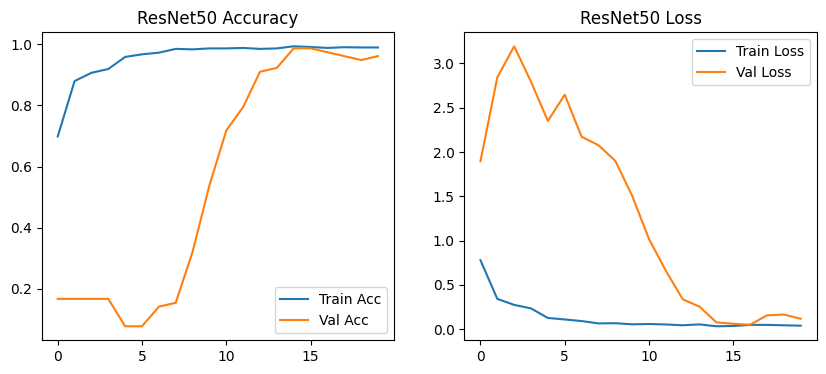

16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 274ms/step
📊 Classification Report for ResNet50
                     precision    recall  f1-score   support

Ph_alexandri_female       1.00      1.00      1.00        41
  Ph_alexandri_male       0.93      1.00      0.96        41
 Ph_papatasi_female       1.00      1.00      1.00        41
   Ph_papatasi_male       1.00      1.00      1.00        41
 Ph_sergenti_female       1.00      1.00      1.00        41
   Ph_sergenti_male       1.00      0.93      0.96        41

           accuracy                           0.99       246
          macro avg       0.99      0.99      0.99       246
       weighted avg       0.99      0.99      0.99       246



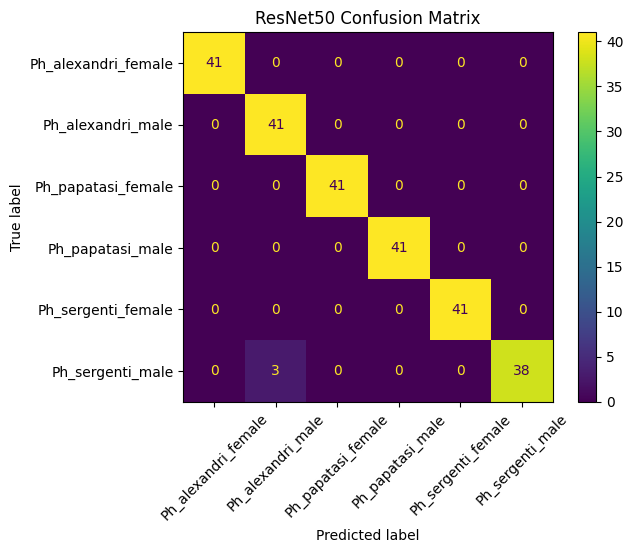


🤝 Evaluating Ensemble Model (Average Fusion)
Ensemble Test Accuracy: 99.19%
📊 Classification Report for Ensemble
                     precision    recall  f1-score   support

Ph_alexandri_female       1.00      1.00      1.00        41
  Ph_alexandri_male       0.95      1.00      0.98        41
 Ph_papatasi_female       1.00      1.00      1.00        41
   Ph_papatasi_male       1.00      1.00      1.00        41
 Ph_sergenti_female       1.00      1.00      1.00        41
   Ph_sergenti_male       1.00      0.95      0.97        41

           accuracy                           0.99       246
          macro avg       0.99      0.99      0.99       246
       weighted avg       0.99      0.99      0.99       246



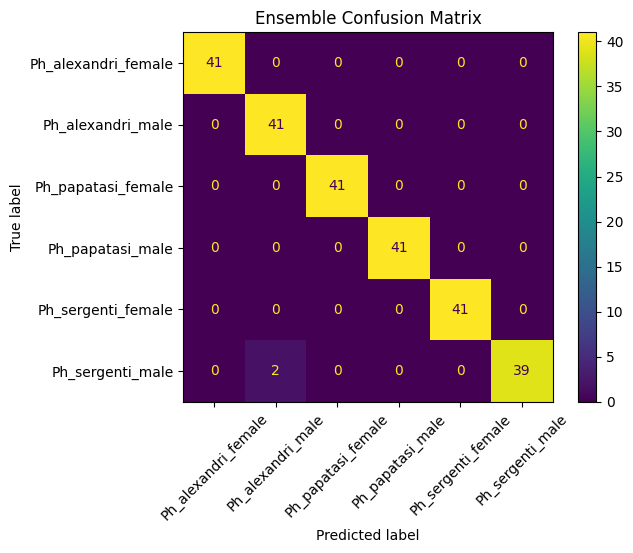

In [ ]:
# --- Install dependencies ---
!pip install tensorflow matplotlib scikit-learn

# --- Imports ---
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import (Dropout, GlobalAveragePooling2D, GlobalMaxPooling2D, Reshape, Dense, Multiply,
                                     Conv2D, Add, Concatenate, Input, MaxPooling2D, Lambda)
from tensorflow.keras.models import Model
from tensorflow.keras.applications import EfficientNetV2S, DenseNet201, ResNet50
from tensorflow.keras import backend as K
from PIL import Image
import io

# --- Dataset paths ---
dataset_source = "/content/Genitalia_Balanced_DATASET/Genitalia_Balanced_DATASET"
train_path = f"{dataset_source}/train"
val_path = f"{dataset_source}/val"
test_path = f"{dataset_source}/test"

# --- Image parameters ---
IMG_SIZE = (224, 224)
BATCH_SIZE = 16  # Reduced batch size for memory efficiency

# --- Data generators ---
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(train_path, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical')
val_gen = val_test_datagen.flow_from_directory(val_path, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical')
test_gen = val_test_datagen.flow_from_directory(test_path, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', shuffle=False)

# --- Global config ---
input_shape = (224, 224, 3)
num_classes = train_gen.num_classes

# --- Attention modules ---
def se_block(input_tensor, ratio=16):
    filters = input_tensor.shape[-1]
    se_shape = (1, 1, filters)
    se = GlobalAveragePooling2D()(input_tensor)
    se = Reshape(se_shape)(se)
    se = Dense(filters // ratio, activation='relu')(se)
    se = Dense(filters, activation='sigmoid')(se)
    return Multiply()([input_tensor, se])

def cbam_block(input_tensor, ratio=16):
    channel = K.int_shape(input_tensor)[-1]
    avg_pool = GlobalAveragePooling2D()(input_tensor)
    max_pool = GlobalMaxPooling2D()(input_tensor)
    shared_dense = Dense(channel // ratio, activation='relu')
    avg_dense = shared_dense(avg_pool)
    max_dense = shared_dense(max_pool)
    channel_attention = Add()([avg_dense, max_dense])
    channel_attention = Dense(channel, activation='sigmoid')(channel_attention)
    channel_attention = Reshape((1, 1, channel))(channel_attention)
    channel_refined = Multiply()([input_tensor, channel_attention])

    avg_pool = Lambda(lambda x: K.mean(x, axis=-1, keepdims=True))(channel_refined)
    max_pool = Lambda(lambda x: K.max(x, axis=-1, keepdims=True))(channel_refined)
    concat = Concatenate(axis=-1)([avg_pool, max_pool])
    spatial_attention = Conv2D(1, (7, 7), padding='same', activation='sigmoid')(concat)
    refined = Multiply()([channel_refined, spatial_attention])
    return refined

# --- Model builders ---
def build_model(base_model_func, attention_func=None, name="Model"):
    base_model = base_model_func(include_top=False, input_shape=input_shape, weights='imagenet')
    base_model.trainable = True

    x = base_model.output
    if attention_func:
        x = attention_func(x)
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.4)(x)
    x = Dense(num_classes, activation='softmax', kernel_regularizer=l2(0.001))(x)

    model = Model(inputs=base_model.input, outputs=x, name=name)
    model.compile(optimizer=tf.keras.optimizers.Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def build_custom_cnn_cbam():
    inputs = Input(shape=input_shape)
    x = Conv2D(32, (3,3), activation='relu', padding='same', kernel_regularizer=l2(0.001))(inputs)
    x = cbam_block(x)
    x = MaxPooling2D()(x)
    x = Dropout(0.3)(x)

    x = Conv2D(64, (3,3), activation='relu', padding='same', kernel_regularizer=l2(0.001))(x)
    x = cbam_block(x)
    x = MaxPooling2D()(x)
    x = Dropout(0.3)(x)

    x = Conv2D(128, (3,3), activation='relu', padding='same', kernel_regularizer=l2(0.001))(x)
    x = cbam_block(x)
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.4)(x)

    outputs = Dense(num_classes, activation='softmax', kernel_regularizer=l2(0.001))(x)
    model = Model(inputs, outputs, name="CustomCNN_CBAM")
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# --- Callbacks ---
callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1),
    ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, verbose=1)  # Save best model
]

# --- Models to train ---
models = {
    "EfficientNetV2S_CBAM": build_model(EfficientNetV2S, cbam_block, "EffNetV2S_CBAM"),
    "DenseNet201_SE": build_model(DenseNet201, se_block, "DenseNet201_SE"),
    "CustomCNN_CBAM": build_custom_cnn_cbam(),
    "ResNet50": build_model(ResNet50, None, "ResNet50")
}

# --- Training and evaluation ---
history_dict = {}
model_predictions = {}
model_results = {}

# Function to check and skip invalid images
def safe_load_img(file_path):
    try:
        img = Image.open(file_path)
        img.verify()  # Verifies if the file is a valid image
        return img
    except (IOError, SyntaxError) as e:
        print(f"Skipping invalid image: {file_path}")
        return None

for name, model in models.items():
    print(f"\n🚀 Training {name} for 20 epochs")
    history = model.fit(train_gen, validation_data=val_gen, epochs=20, callbacks=callbacks)
    history_dict[name] = history

    pd.DataFrame(history.history).to_csv(f"{name}_history.csv", index=False)

    print(f"✅ Evaluating {name}")
    loss, acc = model.evaluate(test_gen)
    print(f"{name} Test Accuracy: {acc * 100:.2f}%")
    model_results[name] = acc

    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title(f"{name} Accuracy")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f"{name} Loss")
    plt.legend()
    plt.show()

    preds = model.predict(test_gen)
    y_pred = np.argmax(preds, axis=1)
    y_true = test_gen.classes
    model_predictions[name] = preds

    print(f"📊 Classification Report for {name}")
    print(classification_report(y_true, y_pred, target_names=list(test_gen.class_indices.keys())))
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(test_gen.class_indices.keys()))
    disp.plot(xticks_rotation=45)
    plt.title(f"{name} Confusion Matrix")
    plt.show()

# --- Ensemble ---
print("\n🤝 Evaluating Ensemble Model (Average Fusion)")
ensemble_preds = np.mean(list(model_predictions.values()), axis=0)
y_pred_ensemble = np.argmax(ensemble_preds, axis=1)
ensemble_acc = np.mean(y_pred_ensemble == test_gen.classes)
print(f"Ensemble Test Accuracy: {ensemble_acc * 100:.2f}%")

print("📊 Classification Report for Ensemble")
print(classification_report(test_gen.classes, y_pred_ensemble, target_names=list(test_gen.class_indices.keys())))
cm = confusion_matrix(test_gen.classes, y_pred_ensemble)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(test_gen.class_indices.keys()))
disp.plot(xticks_rotation=45)
plt.title("Ensemble Confusion Matrix")
plt.show()

Found 1290 images belonging to 6 classes.
Found 78 images belonging to 6 classes.
Found 246 images belonging to 6 classes.

🚀 Training MobileNetV2_CBAM for 20 epochs


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step - accuracy: 0.3753 - loss: 1.5162
Epoch 1: val_loss improved from inf to 0.77341, saving model to best_model_mobilenetv2_cbam_finetuned.h5


81/81 ━━━━━━━━━━━━━━━━━━━━ 46s 366ms/step - accuracy: 0.3768 - loss: 1.5130 - val_accuracy: 0.6026 - val_loss: 0.7734 - learning_rate: 1.0000e-04
Epoch 2/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step - accuracy: 0.7128 - loss: 0.7124
Epoch 2: val_loss improved from 0.77341 to 0.63366, saving model to best_model_mobilenetv2_cbam_finetuned.h5


81/81 ━━━━━━━━━━━━━━━━━━━━ 20s 249ms/step - accuracy: 0.7131 - loss: 0.7118 - val_accuracy: 0.6923 - val_loss: 0.6337 - learning_rate: 1.0000e-04
Epoch 3/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step - accuracy: 0.8113 - loss: 0.5133
Epoch 3: val_loss improved from 0.63366 to 0.57022, saving model to best_model_mobilenetv2_cbam_finetuned.h5


81/81 ━━━━━━━━━━━━━━━━━━━━ 22s 271ms/step - accuracy: 0.8113 - loss: 0.5131 - val_accuracy: 0.7308 - val_loss: 0.5702 - learning_rate: 1.0000e-04
Epoch 4/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step - accuracy: 0.8322 - loss: 0.4280
Epoch 4: val_loss improved from 0.57022 to 0.47632, saving model to best_model_mobilenetv2_cbam_finetuned.h5


81/81 ━━━━━━━━━━━━━━━━━━━━ 35s 204ms/step - accuracy: 0.8322 - loss: 0.4280 - val_accuracy: 0.8205 - val_loss: 0.4763 - learning_rate: 1.0000e-04
Epoch 5/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step - accuracy: 0.8520 - loss: 0.3923
Epoch 5: val_loss did not improve from 0.47632
81/81 ━━━━━━━━━━━━━━━━━━━━ 17s 207ms/step - accuracy: 0.8519 - loss: 0.3923 - val_accuracy: 0.7949 - val_loss: 0.5335 - learning_rate: 1.0000e-04
Epoch 6/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step - accuracy: 0.8716 - loss: 0.3343
Epoch 6: val_loss did not improve from 0.47632
81/81 ━━━━━━━━━━━━━━━━━━━━ 16s 200ms/step - accuracy: 0.8716 - loss: 0.3343 - val_accuracy: 0.8205 - val_loss: 0.5164 - learning_rate: 1.0000e-04
Epoch 7/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step - accuracy: 0.8915 - loss: 0.2995
Epoch 7: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.

Epoch 7: val_loss did not improve from 0.47632
81/81 ━━━━━━━━━━━━━━━━━━━━ 16s 199ms/step - accuracy: 0.8914 - loss: 0.2995 - val_accu

81/81 ━━━━━━━━━━━━━━━━━━━━ 18s 217ms/step - accuracy: 0.9091 - loss: 0.2444 - val_accuracy: 0.8333 - val_loss: 0.3719 - learning_rate: 2.5000e-05
Epoch 12/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step - accuracy: 0.9239 - loss: 0.2116
Epoch 12: val_loss improved from 0.37186 to 0.33098, saving model to best_model_mobilenetv2_cbam_finetuned.h5


81/81 ━━━━━━━━━━━━━━━━━━━━ 17s 208ms/step - accuracy: 0.9238 - loss: 0.2118 - val_accuracy: 0.8846 - val_loss: 0.3310 - learning_rate: 2.5000e-05
Epoch 13/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step - accuracy: 0.9362 - loss: 0.1972
Epoch 13: val_loss improved from 0.33098 to 0.29794, saving model to best_model_mobilenetv2_cbam_finetuned.h5


81/81 ━━━━━━━━━━━━━━━━━━━━ 17s 205ms/step - accuracy: 0.9361 - loss: 0.1975 - val_accuracy: 0.8846 - val_loss: 0.2979 - learning_rate: 2.5000e-05
Epoch 14/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step - accuracy: 0.9108 - loss: 0.2391
Epoch 14: val_loss did not improve from 0.29794
81/81 ━━━━━━━━━━━━━━━━━━━━ 18s 219ms/step - accuracy: 0.9108 - loss: 0.2389 - val_accuracy: 0.9103 - val_loss: 0.3040 - learning_rate: 2.5000e-05
Epoch 15/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step - accuracy: 0.9161 - loss: 0.2351
Epoch 15: val_loss improved from 0.29794 to 0.25943, saving model to best_model_mobilenetv2_cbam_finetuned.h5


81/81 ━━━━━━━━━━━━━━━━━━━━ 17s 208ms/step - accuracy: 0.9162 - loss: 0.2348 - val_accuracy: 0.8974 - val_loss: 0.2594 - learning_rate: 2.5000e-05
Epoch 16/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step - accuracy: 0.9333 - loss: 0.2075
Epoch 16: val_loss improved from 0.25943 to 0.23981, saving model to best_model_mobilenetv2_cbam_finetuned.h5


81/81 ━━━━━━━━━━━━━━━━━━━━ 18s 217ms/step - accuracy: 0.9332 - loss: 0.2075 - val_accuracy: 0.8974 - val_loss: 0.2398 - learning_rate: 2.5000e-05
Epoch 17/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step - accuracy: 0.9246 - loss: 0.2096
Epoch 17: val_loss improved from 0.23981 to 0.19546, saving model to best_model_mobilenetv2_cbam_finetuned.h5


81/81 ━━━━━━━━━━━━━━━━━━━━ 18s 219ms/step - accuracy: 0.9246 - loss: 0.2099 - val_accuracy: 0.9103 - val_loss: 0.1955 - learning_rate: 2.5000e-05
Epoch 18/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step - accuracy: 0.9331 - loss: 0.2098
Epoch 18: val_loss did not improve from 0.19546
81/81 ━━━━━━━━━━━━━━━━━━━━ 16s 198ms/step - accuracy: 0.9330 - loss: 0.2099 - val_accuracy: 0.9231 - val_loss: 0.2317 - learning_rate: 2.5000e-05
Epoch 19/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step - accuracy: 0.9133 - loss: 0.2296
Epoch 19: val_loss did not improve from 0.19546
81/81 ━━━━━━━━━━━━━━━━━━━━ 17s 213ms/step - accuracy: 0.9135 - loss: 0.2295 - val_accuracy: 0.9359 - val_loss: 0.2124 - learning_rate: 2.5000e-05
Epoch 20/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step - accuracy: 0.9314 - loss: 0.2149
Epoch 20: val_loss improved from 0.19546 to 0.18862, saving model to best_model_mobilenetv2_cbam_finetuned.h5


81/81 ━━━━━━━━━━━━━━━━━━━━ 17s 210ms/step - accuracy: 0.9314 - loss: 0.2149 - val_accuracy: 0.9359 - val_loss: 0.1886 - learning_rate: 2.5000e-05
✅ Evaluating MobileNetV2_CBAM_Finetuned
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 167ms/step - accuracy: 0.8882 - loss: 0.2932
MobileNetV2_CBAM_Finetuned Test Accuracy: 92.68%


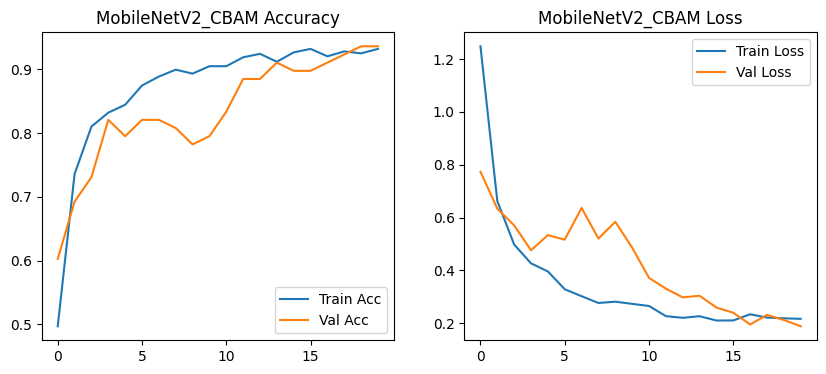

16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 223ms/step
📊 Classification Report for MobileNetV2_CBAM_Finetuned
                     precision    recall  f1-score   support

Ph_alexandri_female       0.97      0.83      0.89        41
  Ph_alexandri_male       0.95      0.90      0.93        41
 Ph_papatasi_female       1.00      0.88      0.94        41
   Ph_papatasi_male       1.00      1.00      1.00        41
 Ph_sergenti_female       0.79      1.00      0.88        41
   Ph_sergenti_male       0.91      0.95      0.93        41

           accuracy                           0.93       246
          macro avg       0.94      0.93      0.93       246
       weighted avg       0.94      0.93      0.93       246



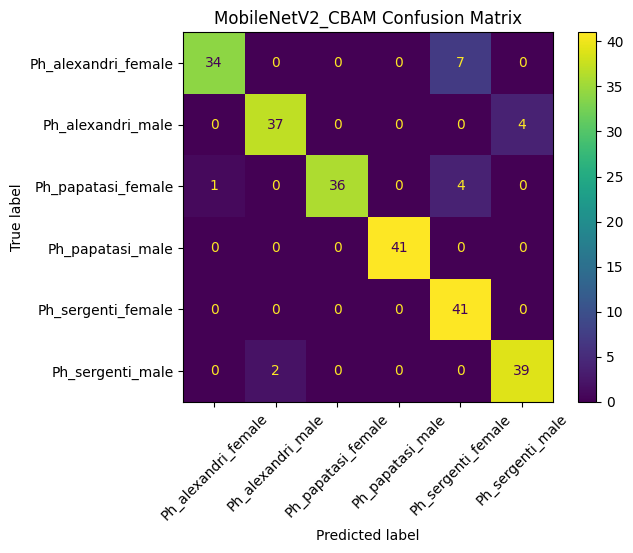

In [11]:
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, Dropout, GlobalAveragePooling2D, Dense, Multiply, Reshape,                                   Lambda, Add, Concatenate, Input, GlobalMaxPooling2D)
from tensorflow.keras.models import Model
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
import numpy as np # Import numpy and assign it the alias 'np'

# --- Dataset paths ---
dataset_source = "/content/Genitalia_Balanced_Original_DATASET/Genitalia_Balanced"
train_path = f"{dataset_source}/train"
val_path = f"{dataset_source}/val"
test_path = f"{dataset_source}/test"

# --- Image parameters ---
IMG_SIZE = (224, 224)
BATCH_SIZE = 16  # Reduced batch size for memory efficiency

# --- Data generators with enhanced data augmentation ---
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,  # Increased rotation range
    width_shift_range=0.3,  # Increased width shift range
    height_shift_range=0.3,  # Increased height shift range
    zoom_range=0.3,  # Increased zoom range
    shear_range=0.2,  # Added shear range
    horizontal_flip=True,
    fill_mode='nearest'
)

val_test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(train_path, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical')
val_gen = val_test_datagen.flow_from_directory(val_path, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical')
test_gen = val_test_datagen.flow_from_directory(test_path, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', shuffle=False)

# --- Global config ---
input_shape = (224, 224, 3)
num_classes = train_gen.num_classes

# --- CBAM Block Definition ---
def cbam_block(input_tensor, ratio=16):
    channel = K.int_shape(input_tensor)[-1]

    # Channel Attention
    avg_pool = GlobalAveragePooling2D()(input_tensor)
    max_pool = GlobalMaxPooling2D()(input_tensor)
    shared_dense = Dense(channel // ratio, activation='relu')
    avg_dense = shared_dense(avg_pool)
    max_dense = shared_dense(max_pool)
    channel_attention = Add()([avg_dense, max_dense])
    channel_attention = Dense(channel, activation='sigmoid')(channel_attention)
    channel_attention = Reshape((1, 1, channel))(channel_attention)
    channel_refined = Multiply()([input_tensor, channel_attention])

    # Spatial Attention
    avg_pool = Lambda(lambda x: K.mean(x, axis=-1, keepdims=True))(channel_refined)
    max_pool = Lambda(lambda x: K.max(x, axis=-1, keepdims=True))(channel_refined)
    concat = Concatenate(axis=-1)([avg_pool, max_pool])
    spatial_attention = Conv2D(1, (7, 7), padding='same', activation='sigmoid')(concat)
    refined = Multiply()([channel_refined, spatial_attention])

    return refined

# --- MobileNetV2 Model with CBAM --- Fine-tuned
def build_mobilenetv2_cbam_finetuned():
    base_model = MobileNetV2(input_shape=input_shape, include_top=False, weights='imagenet')

    base_model.trainable = True  # Unfreeze the entire model
    for layer in base_model.layers[:-20]:  # Optionally freeze the earlier layers
        layer.trainable = False

    x = base_model.output
    x = cbam_block(x)  # Apply CBAM after base model layers
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)  # Adjusted dropout

    outputs = Dense(num_classes, activation='softmax', kernel_regularizer=l2(0.001))(x)

    model = Model(inputs=base_model.input, outputs=outputs, name="MobileNetV2_CBAM_Finetuned")
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# --- Callbacks ---
callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1),
    ModelCheckpoint('best_model_mobilenetv2_cbam_finetuned.h5', monitor='val_loss', save_best_only=True, verbose=1)  # Save best model
]

# --- Training the MobileNetV2_CBAM Model ---
history_dict = {}
model_predictions = {}
model_results = {}

# Train the MobileNetV2_CBAM model
print("\n🚀 Training MobileNetV2_CBAM for 20 epochs")
history = build_mobilenetv2_cbam_finetuned().fit(train_gen, validation_data=val_gen, epochs=20, callbacks=callbacks)
history_dict["MobileNetV2_CBAM_Finetuned"] = history

# Save training history to CSV
pd.DataFrame(history.history).to_csv("MobileNetV2_CBAM_Finetuned_history.csv", index=False)

# Evaluate the model
print(f"✅ Evaluating MobileNetV2_CBAM_Finetuned")
loss, acc = history.model.evaluate(test_gen)
print(f"MobileNetV2_CBAM_Finetuned Test Accuracy: {acc * 100:.2f}%")
model_results["MobileNetV2_CBAM_Finetuned"] = acc

# Plot training/validation accuracy and loss
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("MobileNetV2_CBAM Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("MobileNetV2_CBAM Loss")
plt.legend()
plt.show()

# Classification Report and Confusion Matrix
preds = history.model.predict(test_gen)
y_pred = np.argmax(preds, axis=1)
y_true = test_gen.classes
model_predictions["MobileNetV2_CBAM_Finetuned"] = preds

print(f"📊 Classification Report for MobileNetV2_CBAM_Finetuned")
print(classification_report(y_true, y_pred, target_names=list(test_gen.class_indices.keys())))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(test_gen.class_indices.keys()))
disp.plot(xticks_rotation=45)
plt.title("MobileNetV2_CBAM Confusion Matrix")
plt.show()

# XAI

In [1]:
!pip install torchvision torch pytorch-grad-cam
!pip install grad-cam
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from pytorch_grad_cam import GradCAM # this should now work
from pytorch_grad_cam.utils.image import show_cam_on_image
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget

ERROR: Could not find a version that satisfies the requirement pytorch-grad-cam (from versions: none)
ERROR: No matching distribution found for pytorch-grad-cam


In [2]:
# Path to your dataset (replace with your actual path in Google Drive)
img_folder = '/content/Genitalia_Balanced_Original_DATASET/Genitalia_Balanced'
infected_folder = img_folder + '/content/Genitalia_Balanced_Original_DATASET/Genitalia_Balanced/Ph_papatasi_male/461.jpg'
non_infected_folder = img_folder + '/content/Genitalia_Balanced_Original_DATASET/Genitalia_Balanced/Ph_papatasi_female/200.jpg' #Fixed typo: changed 'non_infected' to 'non-infected'

In [3]:
import os
img_paths = []
labels = []

In [4]:
import os

train_folder = "/content/Genitalia_Balanced_Original_DATASET/Genitalia_Balanced/train"

# List the contents of the train folder
print(os.listdir(train_folder))


['Ph_sergenti_female', 'Ph_papatasi_male', 'Ph_papatasi_female', 'Ph_alexandri_male', 'Ph_sergenti_male', 'Ph_alexandri_female']


In [5]:
import os

# Path to the train folder
train_folder = "/content/Genitalia_Balanced_Original_DATASET/Genitalia_Balanced/train"

img_paths = []
labels = []

# Define class labels based on subfolders
class_names = ['Ph_sergenti_female', 'Ph_papatasi_male', 'Ph_papatasi_female', 'Ph_alexandri_male', 'Ph_sergenti_male', 'Ph_alexandri_female']

# Loop through each class folder
for class_index, class_name in enumerate(class_names):
    class_folder = os.path.join(train_folder, class_name)

    # Collect images for each class
    for img_name in os.listdir(class_folder):
        img_path = os.path.join(class_folder, img_name)

        if os.path.isfile(img_path):  # Ensure the file exists
            img_paths.append(img_path)
            labels.append(class_index)  # Label each image with the corresponding class index

# Print the total number of images collected
print(f"Total images: {len(img_paths)}")


Total images: 1290


In [6]:
# Define the MedicalDataset class
class MedicalDataset(Dataset):
    def __init__(self, img_paths, labels, transform=None):
        self.img_paths = img_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.img_paths)

    def __getitem__(self, idx):
        img_path = self.img_paths[idx]
        label = self.labels[idx]
        image = Image.open(img_path).convert('RGB') # Ensure the image is loaded as RGB
        if self.transform:
            image = self.transform(image)
        return image, label

# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
# Create dataset and dataloader
dataset = MedicalDataset(img_paths, labels, transform=transform)
data_loader = DataLoader(dataset, batch_size=32, shuffle=True)
# Load DenseNet201 pre-trained model
model = models.densenet201(pretrained=True)

# Replace the classifier layer to fit your number of classes
model.classifier = nn.Linear(1920, 2)  # Assuming binary classification (infected vs non-infected)

# Move the model to the appropriate device (GPU/CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet201_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet201_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/densenet201-c1103571.pth" to /root/.cache/torch/hub/checkpoints/densenet201-c1103571.pth
100%|██████████| 77.4M/77.4M [00:00<00:00, 155MB/s]


In [7]:
# Define the MedicalDataset class
class MedicalDataset(Dataset):
    def __init__(self, img_paths, labels, transform=None):
        self.img_paths = img_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.img_paths)

    def __getitem__(self, idx):
        img_path = self.img_paths[idx]
        label = self.labels[idx]

        try:  # Check for loading errors
            image = Image.open(img_path).convert('RGB')  # Ensure the image is loaded as RGB
            if self.transform:
                image = self.transform(image)
        except (IOError, SyntaxError, RuntimeError) as e:  # Include RuntimeError in exception handling
            print(f"Skipping invalid image: {img_path} due to error: {e}")
            # Option 1: return a default or blank image with a negative label
            # Option 2: raise an exception to drop the image completely
            # You chose Option 1: return a default image
            return Image.new('RGB', (224, 224)), -1

        return image, label  # Return the image and label


In [8]:
# Define the MedicalDataset class
class MedicalDataset(Dataset):
    def __init__(self, img_paths, labels, transform=None):
        self.img_paths = img_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.img_paths)

    def __getitem__(self, idx):
        img_path = self.img_paths[idx]

        try:  # Check for loading errors
            image = Image.open(img_path).convert('RGB')  # Ensure the image is loaded as RGB
            if self.transform:
                image = self.transform(image)
            label = self.labels[idx]  # Get the label after successful image loading
        except (IOError, SyntaxError, RuntimeError) as e:  # Include RuntimeError in exception handling
            print(f"Skipping invalid image: {img_path} due to error: {e}")
            # Return a default image and a negative label
            return Image.new('RGB', (224, 224)), -1

        return image, label  # Return the image and label

In [9]:
# Apply Grad-CAM
target_layers = [model.features.denseblock4]  # Select the target layer to visualize

# Remove use_cuda argument
cam = GradCAM(model=model, target_layers=target_layers)

In [10]:
import torch
from PIL import Image
import torchvision.transforms as transforms
import os

# Path to your test image
image_path = '/content/Genitalia_Balanced_Original_DATASET/Genitalia_Balanced/Ph_papatasi_male/461.jpg'

# Load the image and apply necessary transformations
img = Image.open(image_path).convert('RGB')

# Define the transformation pipeline
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to 224x224 for EfficientNetV2
    transforms.ToTensor(),  # Convert image to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize for ImageNet
])

# Apply transformations to the image
input_tensor = transform(img).unsqueeze(0)  # Add batch dimension (1, 3, 224, 224)
print(f"Input tensor shape before moving to device: {input_tensor.shape}")

# Temporarily switch to CPU for debugging
device = torch.device("cpu")
input_tensor = input_tensor.to(device)

# Make sure the model is on the correct device as well
model = model.to(device)

# Print the model device to check compatibility
print(f"Model is on device: {next(model.parameters()).device}")

# Perform inference
model.eval()  # Set the model to evaluation mode
with torch.no_grad():  # Disable gradient computation for inference
    outputs = model(input_tensor)

# Get the predicted class
_, predicted_class = torch.max(outputs, 1)
print(f"Predicted class: {predicted_class.item()}")


Input tensor shape before moving to device: torch.Size([1, 3, 224, 224])
Model is on device: cpu
Predicted class: 1


In [11]:
# Assuming you have a dictionary that maps class indices to class names
class_names = {
    0: 'Ph_alexandri_female',
    1: 'Ph_alexandri_male',
    2: 'Ph_papatasi_female',
    3: 'Ph_papatasi_male',
    4: 'Ph_sergenti_female',
    5: 'Ph_sergenti_male'
}

# Get the class name corresponding to the predicted index
predicted_class_name = class_names[predicted_class.item()]
print(f"Predicted class name: {predicted_class_name}")


Predicted class name: Ph_alexandri_male


In [14]:
# Choose device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move model and input to the same device
model = model.to(device)
input_tensor = input_tensor.to(device)

# Generate CAM
targets = [ClassifierOutputTarget(1)]  # Target class index
grayscale_cam = cam(input_tensor=input_tensor, targets=targets)


In [15]:
# Resize the original image to match the CAM dimensions
img = img.resize((224, 224))

# Convert the image to the correct data type and number of channels
img_np = np.array(img)
if len(img_np.shape) == 2:  # Grayscale image
    img_np = cv2.cvtColor(img_np, cv2.COLOR_GRAY2BGR)

# Normalize the image to be in the range [0, 255] and ensure it's uint8
img_np = np.uint8(255 * img_np / np.max(img_np))

# Ensure grayscale_cam is in the correct format (CV_8UC1)
if len(grayscale_cam.shape) == 3:
    grayscale_cam = grayscale_cam[:, :, 0] #If grayscale_cam has more than one channel, take the first one.
grayscale_cam = np.uint8(255 * grayscale_cam)

# Generate CAM
cam_image = show_cam_on_image(img_np, grayscale_cam, use_rgb=True)

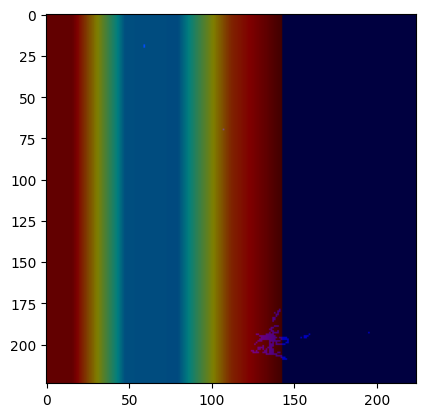

In [16]:
# Display the result
plt.imshow(cam_image)
plt.show()

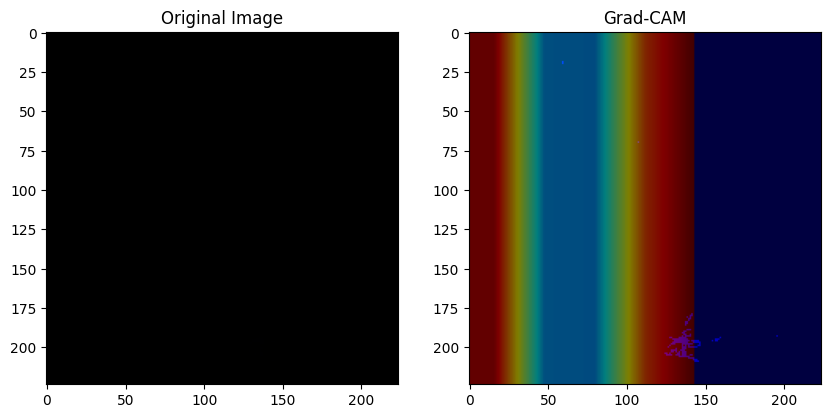

In [17]:
# 8. Display the original image and the Grad-CAM overlay
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img_np) # Changed image_np to img_np

plt.subplot(1, 2, 2)
plt.title('Grad-CAM')
plt.imshow(cam_image)

plt.show()

100%|██████████| 120/120 [06:18<00:00,  3.15s/it]


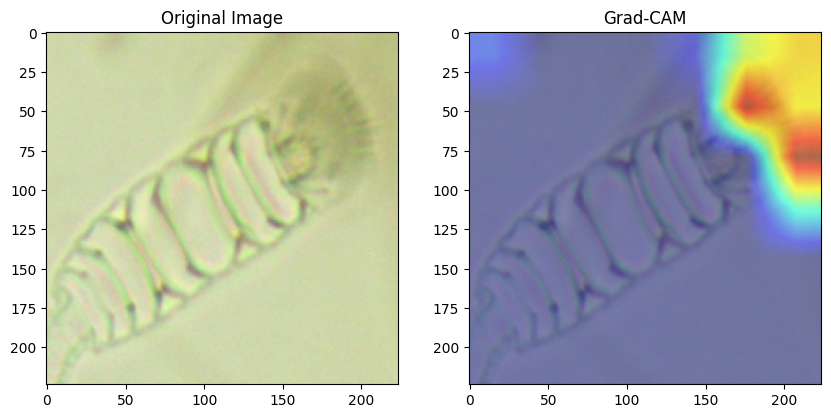

In [39]:
# Test the model on a new image
image_path = '/content/Genitalia_Balanced_Original_DATASET/Genitalia_Balanced/Ph_papatasi_female/195.jpg'  # Your test image
img = Image.open(image_path).convert('RGB')
input_tensor = transform(img).unsqueeze(0).to(device)
# Generate CAM
targets = [ClassifierOutputTarget(1)]  # Assuming label 1 corresponds to 'infected'
grayscale_cam = cam(input_tensor=input_tensor, targets=targets)

# Resize the original image to match the CAM dimensions
img = img.resize((224, 224))
img_np = np.array(img) / 255.0

# Ensure grayscale_cam has the correct number of channels
if len(grayscale_cam.shape) == 2:
    grayscale_cam = grayscale_cam[..., np.newaxis]
# Generate CAM
cam_image = show_cam_on_image(img_np, grayscale_cam[0, :], use_rgb=True)

# 8. Display the original image and the Grad-CAM overlay
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img_np)

plt.subplot(1, 2, 2)
plt.title('Grad-CAM')
plt.imshow(cam_image)

plt.show()

In [18]:
# Test the model on a new image
image_path = '/content/Genitalia_Balanced_Original_DATASET/Genitalia_Balanced/test/Ph_papatasi_female/428.jpg'  # Your test image
img = Image.open(image_path).convert('RGB')
input_tensor = transform(img).unsqueeze(0).to(device)

In [19]:
# Generate CAM
targets = [ClassifierOutputTarget(1)]  # Assuming label 1 corresponds to 'infected'
grayscale_cam = cam(input_tensor=input_tensor, targets=targets)

# Resize the original image to match the CAM dimensions
img = img.resize((224, 224))
img_np = np.array(img) / 255.0

# Ensure grayscale_cam has the correct number of channels
if len(grayscale_cam.shape) == 2:
    grayscale_cam = grayscale_cam[..., np.newaxis]


In [20]:
# Generate CAM
cam_image = show_cam_on_image(img_np, grayscale_cam[0, :], use_rgb=True)

# 8. Display the original image and the Grad-CAM overlay
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img_np)

plt.subplot(1, 2, 2)
plt.title('Grad-CAM')
plt.imshow(cam_image)

plt.show()

In [21]:
# Test the model on a new image
image_path = '/content/Genitalia_Balanced_Original_DATASET/Genitalia_Balanced/test/Ph_alexandri_male/147.jpg'  # Your test image
img = Image.open(image_path).convert('RGB')
input_tensor = transform(img).unsqueeze(0).to(device)

# Generate CAM
targets = [ClassifierOutputTarget(1)]  # Assuming label 1 corresponds to 'infected'
grayscale_cam = cam(input_tensor=input_tensor, targets=targets)

# Resize the original image to match the CAM dimensions
img = img.resize((224, 224))
img_np = np.array(img) / 255.0

# Ensure grayscale_cam has the correct number of channels
if len(grayscale_cam.shape) == 2:
    grayscale_cam = grayscale_cam[..., np.newaxis]

# Generate CAM
cam_image = show_cam_on_image(img_np, grayscale_cam[0, :], use_rgb=True)

# 8. Display the original image and the Grad-CAM overlay
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img_np)

plt.subplot(1, 2, 2)
plt.title('Grad-CAM')
plt.imshow(cam_image)

plt.show()

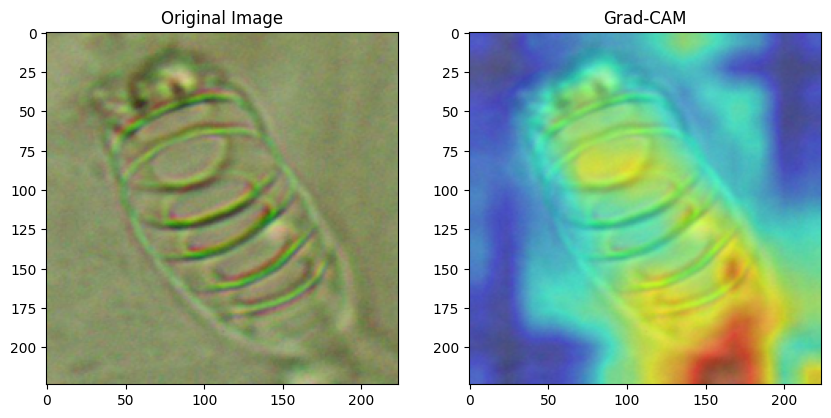

In [33]:
# Test the model on a new image
image_path = '/content/Genitalia_Balanced_Original_DATASET/Genitalia_Balanced/test/Ph_papatasi_female/377.jpg'  # Your test image
img = Image.open(image_path).convert('RGB')
input_tensor = transform(img).unsqueeze(0).to(device)

# Generate CAM
targets = [ClassifierOutputTarget(1)]  # Assuming label 1 corresponds to 'infected'
grayscale_cam = cam(input_tensor=input_tensor, targets=targets)

# Resize the original image to match the CAM dimensions
img = img.resize((224, 224))
img_np = np.array(img) / 255.0

# Ensure grayscale_cam has the correct number of channels
if len(grayscale_cam.shape) == 2:
    grayscale_cam = grayscale_cam[..., np.newaxis]

# Generate CAM
cam_image = show_cam_on_image(img_np, grayscale_cam[0, :], use_rgb=True)

# 8. Display the original image and the Grad-CAM overlay
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img_np)

plt.subplot(1, 2, 2)
plt.title('Grad-CAM')
plt.imshow(cam_image)

plt.show()

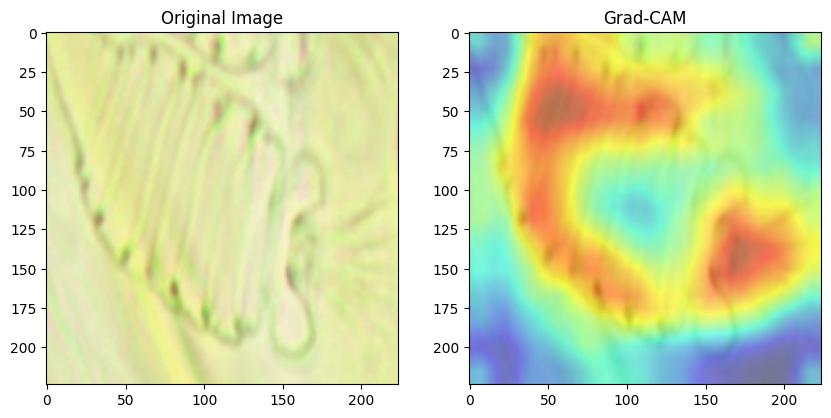

In [34]:
# Test the model on a new image
image_path = '/content/Genitalia_Balanced_Original_DATASET/Genitalia_Balanced/test/Ph_alexandri_female/aug_029.jpg'  # Your test image
img = Image.open(image_path).convert('RGB')
input_tensor = transform(img).unsqueeze(0).to(device)

# Generate CAM
targets = [ClassifierOutputTarget(1)]  # Assuming label 1 corresponds to 'infected'
grayscale_cam = cam(input_tensor=input_tensor, targets=targets)

# Resize the original image to match the CAM dimensions
img = img.resize((224, 224))
img_np = np.array(img) / 255.0

# Ensure grayscale_cam has the correct number of channels
if len(grayscale_cam.shape) == 2:
    grayscale_cam = grayscale_cam[..., np.newaxis]

# Generate CAM
cam_image = show_cam_on_image(img_np, grayscale_cam[0, :], use_rgb=True)

# 8. Display the original image and the Grad-CAM overlay
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img_np)

plt.subplot(1, 2, 2)
plt.title('Grad-CAM')
plt.imshow(cam_image)

plt.show()

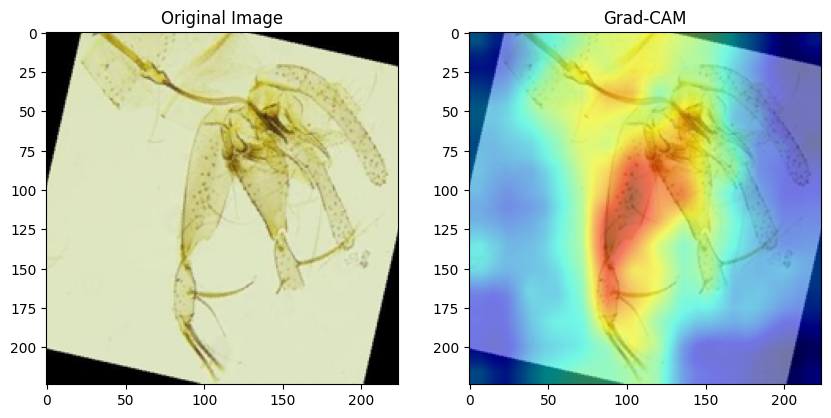

In [35]:
# Test the model on a new image
image_path = '/content/Genitalia_Balanced_Original_DATASET/Genitalia_Balanced/test/Ph_sergenti_male/aug_024.jpg'  # Your test image
img = Image.open(image_path).convert('RGB')
input_tensor = transform(img).unsqueeze(0).to(device)

# Generate CAM
targets = [ClassifierOutputTarget(1)]  # Assuming label 1 corresponds to 'infected'
grayscale_cam = cam(input_tensor=input_tensor, targets=targets)

# Resize the original image to match the CAM dimensions
img = img.resize((224, 224))
img_np = np.array(img) / 255.0

# Ensure grayscale_cam has the correct number of channels
if len(grayscale_cam.shape) == 2:
    grayscale_cam = grayscale_cam[..., np.newaxis]

# Generate CAM
cam_image = show_cam_on_image(img_np, grayscale_cam[0, :], use_rgb=True)

# 8. Display the original image and the Grad-CAM overlay
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img_np)

plt.subplot(1, 2, 2)
plt.title('Grad-CAM')
plt.imshow(cam_image)

plt.show()

In [22]:
!pip install pytorch-gradcam
!pip install pytorch-grad-cam # Correct package name is 'pytorch-grad-cam'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 15.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pytorch-gradcam: filename=pytorch_gradcam-0.2.1-py3-none-any.whl size=5249 sha256=f4941cacf4a16dfbd03d2466aabdca2bdf7ac23e38c66475b543bdd977c8d0a4
  Stored in directory: /root/.cache/pip/wheels/20/d6/4e/1ac02c54faee563b4d06015456c6c5d85550dcec878740f37d
Successfully built pytorch-gradcam
ERROR: Could not find a version that satisfies the requirement pytorch-grad-cam (from versions: none)
ERROR: No matching distribution found for pytorch-grad-cam


In [23]:
!pip install grad-cam

# ScoreCAM

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet201_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet201_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
100%|██████████| 120/120 [07:03<00:00,  3.53s/it]


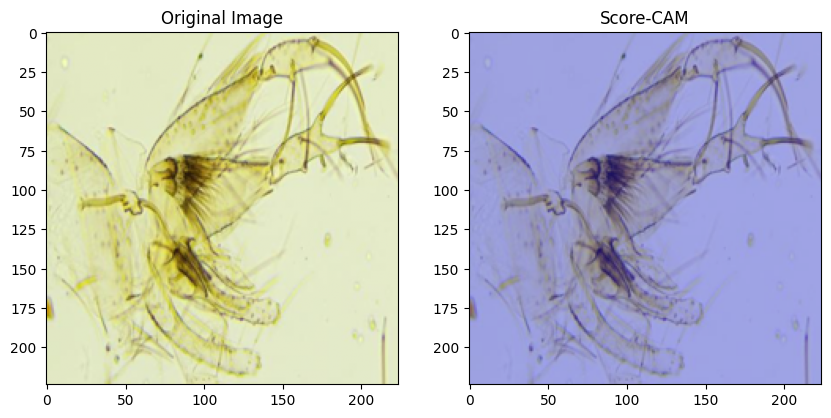

In [24]:
import torchvision.transforms as transforms #import transforms module
import torchvision.transforms as transforms #import transforms module

from pytorch_grad_cam import ScoreCAM
from pytorch_grad_cam.utils.image import show_cam_on_image
# Import ClassifierOutputTarget
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import torch  # Import the 'torch' module
import torchvision.models as models  # Import the 'models' module to load pre-trained models

# Define the device (CPU or CUDA) before using it
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define the transformation pipeline for

from pytorch_grad_cam import ScoreCAM
from pytorch_grad_cam.utils.image import show_cam_on_image
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# ... your existing code for model loading, transform, and device ...

# Load a pre-trained DenseNet201 model (or replace with your model)
model = models.densenet201(pretrained=True)

# Define the transformation pipeline for the input image
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize image to 224x224 (for EfficientNetV2)
    transforms.ToTensor(),  # Convert image to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize to ImageNet mean and std
])

# Test the model on a new image
image_path = '/content/Genitalia_Balanced_Original_DATASET/Genitalia_Balanced/test/Ph_alexandri_male/145.jpg'  # Your test image
img = Image.open(image_path).convert('RGB')
input_tensor = transform(img).unsqueeze(0).to(device)

# Initialize Score-CAM
target_layers = [model.features.denseblock4]  # Select the target layer to visualize (adjust for your model)
cam = ScoreCAM(model=model, target_layers=target_layers) # Replace model and target_layers

# Generate CAM
targets = [ClassifierOutputTarget(1)]  # Assuming label 1 corresponds to 'infected'
grayscale_cam = cam(input_tensor=input_tensor, targets=targets)

# Resize the original image to match the CAM dimensions
img = img.resize((224, 224))
img_np = np.array(img) / 255.0

# Ensure grayscale_cam has the correct number of channels
if len(grayscale_cam.shape) == 2:
    grayscale_cam = grayscale_cam[..., np.newaxis]

# Generate CAM
cam_image = show_cam_on_image(img_np, grayscale_cam[0, :], use_rgb=True)

# Display the original image and the Score-CAM overlay
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img_np)
plt.subplot(1, 2, 2)
plt.title('Score-CAM')
plt.imshow(cam_image)
plt.show()

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet201_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet201_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
100%|██████████| 120/120 [05:38<00:00,  2.82s/it]


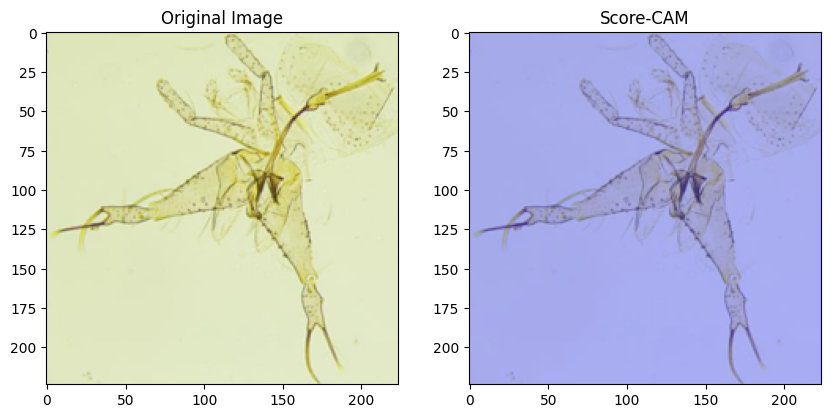

In [36]:
import torchvision.transforms as transforms #import transforms module
import torchvision.transforms as transforms #import transforms module

from pytorch_grad_cam import ScoreCAM
from pytorch_grad_cam.utils.image import show_cam_on_image
# Import ClassifierOutputTarget
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import torch  # Import the 'torch' module
import torchvision.models as models  # Import the 'models' module to load pre-trained models

# Define the device (CPU or CUDA) before using it
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define the transformation pipeline for

from pytorch_grad_cam import ScoreCAM
from pytorch_grad_cam.utils.image import show_cam_on_image
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# ... your existing code for model loading, transform, and device ...

# Load a pre-trained DenseNet201 model (or replace with your model)
model = models.densenet201(pretrained=True)

# Define the transformation pipeline for the input image
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize image to 224x224 (for EfficientNetV2)
    transforms.ToTensor(),  # Convert image to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize to ImageNet mean and std
])

# Test the model on a new image
image_path = '/content/Genitalia_Balanced_Original_DATASET/Genitalia_Balanced/test/Ph_sergenti_male/712.jpg'  # Your test image
img = Image.open(image_path).convert('RGB')
input_tensor = transform(img).unsqueeze(0).to(device)

# Initialize Score-CAM
target_layers = [model.features.denseblock4]  # Select the target layer to visualize (adjust for your model)
cam = ScoreCAM(model=model, target_layers=target_layers) # Replace model and target_layers

# Generate CAM
targets = [ClassifierOutputTarget(1)]  # Assuming label 1 corresponds to 'infected'
grayscale_cam = cam(input_tensor=input_tensor, targets=targets)

# Resize the original image to match the CAM dimensions
img = img.resize((224, 224))
img_np = np.array(img) / 255.0

# Ensure grayscale_cam has the correct number of channels
if len(grayscale_cam.shape) == 2:
    grayscale_cam = grayscale_cam[..., np.newaxis]

# Generate CAM
cam_image = show_cam_on_image(img_np, grayscale_cam[0, :], use_rgb=True)

# Display the original image and the Score-CAM overlay
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img_np)
plt.subplot(1, 2, 2)
plt.title('Score-CAM')
plt.imshow(cam_image)
plt.show()

# GradCAMPlusPlus

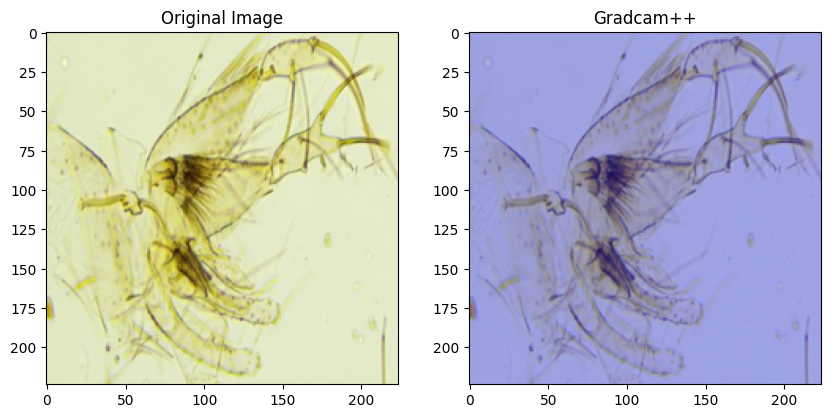

In [25]:
!pip install pytorch-gradcam

from pytorch_grad_cam import GradCAMPlusPlus
from pytorch_grad_cam.utils.image import show_cam_on_image
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# ... your existing code for model loading, transform, and device ...

# Test the model on a new image
image_path = '/content/Genitalia_Balanced_Original_DATASET/Genitalia_Balanced/test/Ph_sergenti_male/700.jpg'
img = Image.open(image_path).convert('RGB')
input_tensor = transform(img).unsqueeze(0).to(device)

# Initialize GradCAM++
cam = GradCAMPlusPlus(model=model, target_layers=target_layers)

# Generate CAM
targets = [ClassifierOutputTarget(1)]
grayscale_cam = cam(input_tensor=input_tensor, targets=targets)

# ... (Resize, handle channels, and visualize as in the previous example) ...
# Display the original
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img_np)
plt.subplot(1, 2, 2)
plt.title('Gradcam++')
plt.imshow(cam_image)
plt.show()

# XGradCAM

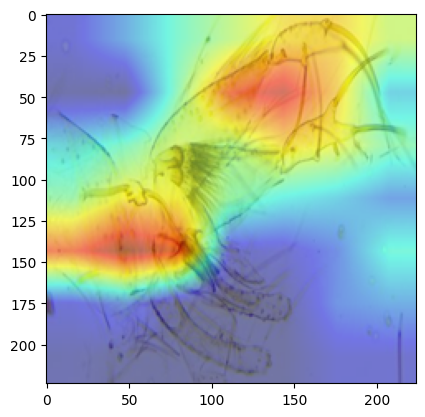

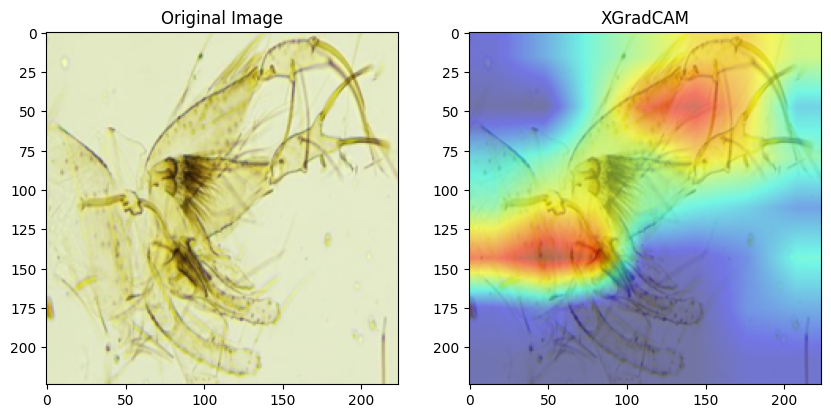

In [26]:
from pytorch_grad_cam import XGradCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget

# Initialize XGrad-CAM
cam = XGradCAM(model=model, target_layers=target_layers)

# Generate the heatmap
grayscale_cam = cam(input_tensor=input_tensor, targets=targets)

# Visualize
cam_image = show_cam_on_image(img_np, grayscale_cam[0], use_rgb=True)
plt.imshow(cam_image)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img_np)
plt.subplot(1, 2, 2)
plt.title('XGradCAM')
plt.imshow(cam_image)
plt.show()

# EigenCAM

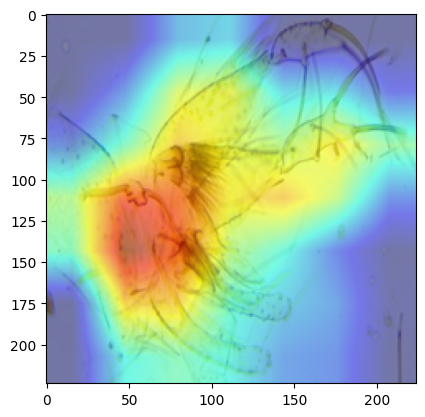

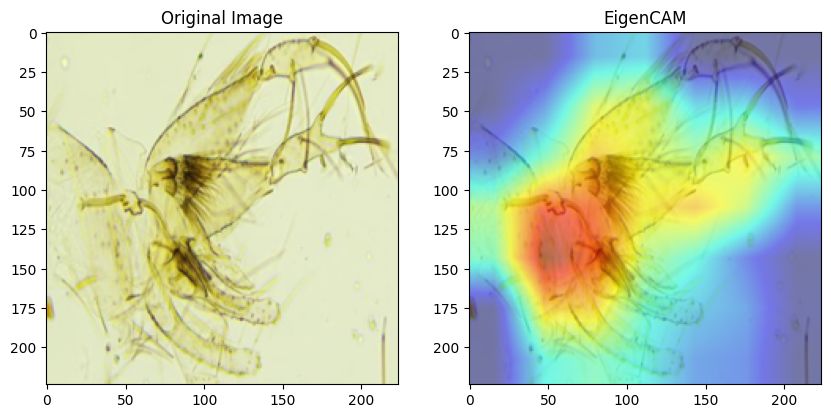

In [27]:
from pytorch_grad_cam import EigenCAM

# Initialize EigenCAM
cam = EigenCAM(model=model, target_layers=target_layers)

# Generate the heatmap
grayscale_cam = cam(input_tensor=input_tensor, targets=targets)

# Visualize
cam_image = show_cam_on_image(img_np, grayscale_cam[0], use_rgb=True)
plt.imshow(cam_image)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img_np)
plt.subplot(1, 2, 2)
plt.title('EigenCAM')
plt.imshow(cam_image)
plt.show()


# LayerCAM

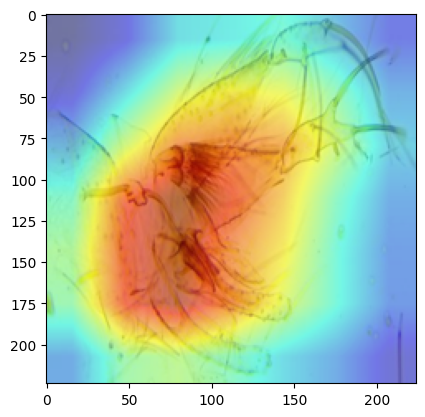

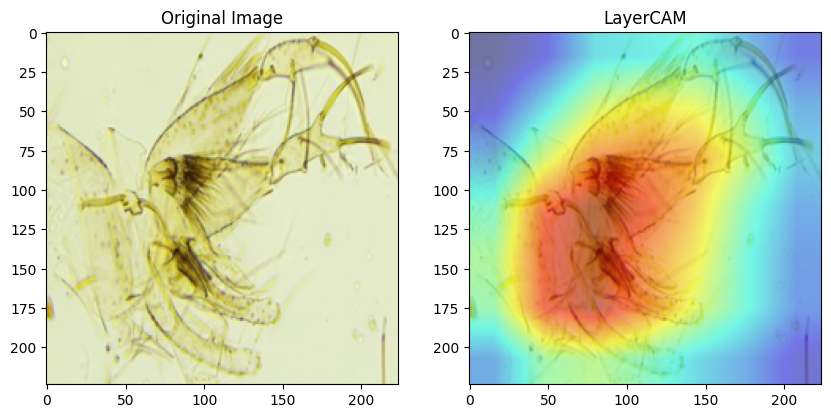

In [28]:
from pytorch_grad_cam import LayerCAM

# Initialize LayerCAM
cam = LayerCAM(model=model, target_layers=target_layers)

# Generate the heatmap
grayscale_cam = cam(input_tensor=input_tensor, targets=targets)

# Visualize
cam_image = show_cam_on_image(img_np, grayscale_cam[0], use_rgb=True)
plt.imshow(cam_image)
plt.show()

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img_np)
plt.subplot(1, 2, 2)
plt.title('LayerCAM')
plt.imshow(cam_image)
plt.show()


# Full-Gradient / FullGrad

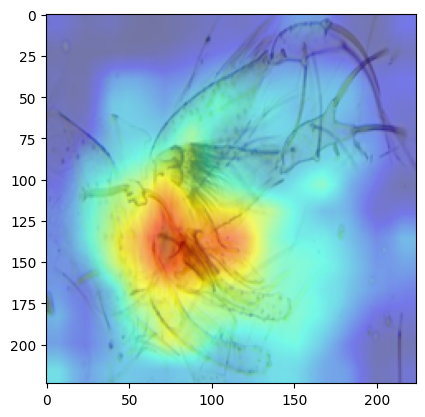

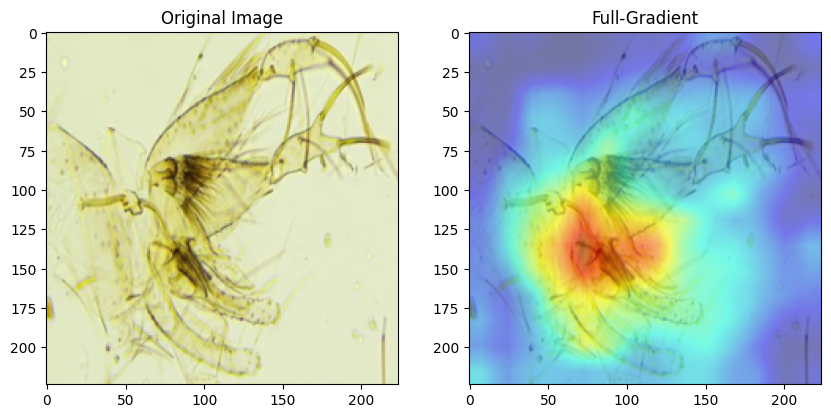

In [29]:
from pytorch_grad_cam import FullGrad

# Initialize Full-Gradient with target layers
cam = FullGrad(model=model, target_layers=target_layers)

# Generate the heatmap
grayscale_cam = cam(input_tensor=input_tensor, targets=targets)

# Visualize
cam_image = show_cam_on_image(img_np, grayscale_cam[0], use_rgb=True)
plt.imshow(cam_image)
plt.show()


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img_np)
plt.subplot(1, 2, 2)
plt.title('Full-Gradient')
plt.imshow(cam_image)
plt.show()

# Thresholded CAM (Binary Mask)

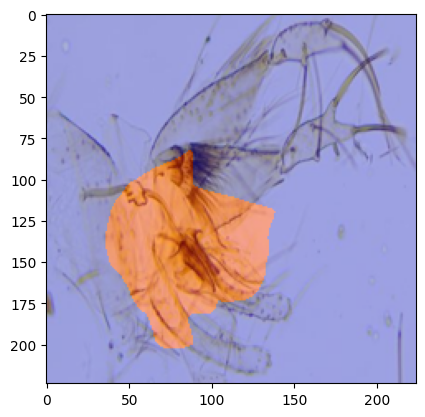

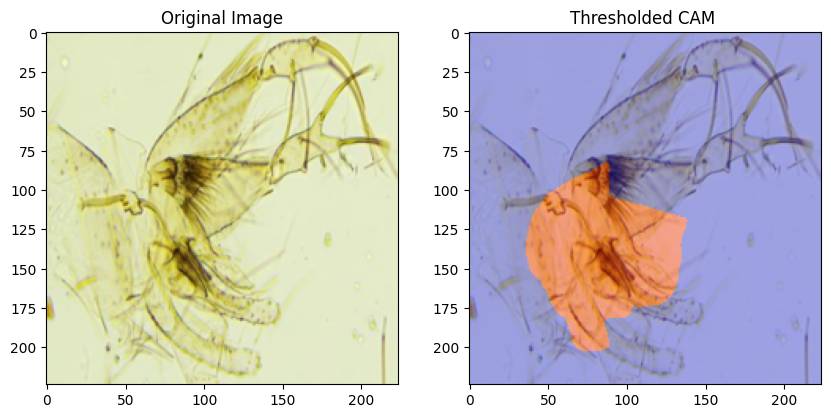

In [30]:
# Generate CAM (using any method, e.g., AblationCAM, GradCAM)
grayscale_cam = cam(input_tensor=input_tensor, targets=targets)

# Apply a threshold to binarize the heatmap (e.g., threshold at 0.5)
threshold = 0.5
binary_cam = (grayscale_cam[0] > threshold).astype(float)

# Visualize the binary heatmap
cam_image = show_cam_on_image(img_np, binary_cam, use_rgb=True)
plt.imshow(cam_image)
plt.show()

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img_np)
plt.subplot(1, 2, 2)
plt.title('Thresholded CAM ')
plt.imshow(cam_image)
plt.show()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 15.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=9ab90b040d4dee05fd1c7310e3095a8ea44b39f64bce3b882b025fb44d4ab2e3
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet201_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet201_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


  0%|          | 0/1000 [00:00<?, ?it/s]

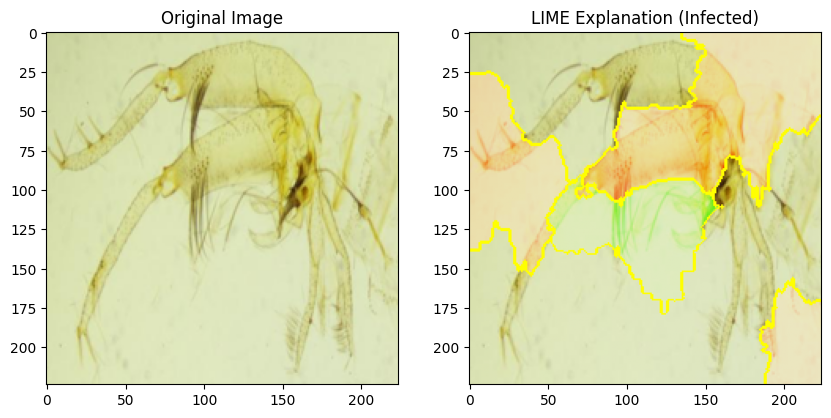

In [32]:
!pip install lime
import torch
from lime import lime_image
from skimage.segmentation import mark_boundaries
import torch
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms as transforms #import transforms module
import torchvision.models as models # Import torchvision.models

# Define device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load and preprocess the image
image_path = '/content/Genitalia_Balanced_Original_DATASET/Genitalia_Balanced/test/Ph_papatasi_male/463.jpg'
img = Image.open(image_path).convert('RGB')
img = img.resize((224, 224))  # Assuming your model expects 224x224 input
img_np = np.array(img)

# Define the transformation pipeline for
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to 224x224 for EfficientNetV2
    transforms.ToTensor(),  # Convert image to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize for ImageNet
])

# Load your pre-trained model (example using DenseNet201)
model = models.densenet201(pretrained=True)
# Assuming binary classification (infected vs non-infected)
num_classes = 2  # Replace with the actual number of classes in your task
model.classifier = torch.nn.Linear(in_features=model.classifier.in_features, out_features=num_classes)
model = model.to(device) # Move the model to the appropriate device


# Convert the image to a format the model can accept
input_tensor = transform(img).unsqueeze(0).to(device)

# Define a prediction function that returns model output probabilities
def predict_fn(images):
    # Convert images to tensors and pass through the model
    inputs = [transform(Image.fromarray(image)).unsqueeze(0).to(device) for image in images]
    inputs = torch.cat(inputs, dim=0)
    with torch.no_grad():
        outputs = model(inputs)  # Assuming your model variable is named `model`
    return outputs.cpu().numpy()

# Initialize LIME explainer
explainer = lime_image.LimeImageExplainer()

# Get LIME explanation
explanation = explainer.explain_instance(img_np,
                                         classifier_fn=predict_fn,
                                         top_labels=2,
                                         hide_color=0,
                                         num_samples=1000)

# Show explanation for class label 1 (infected)
temp, mask = explanation.get_image_and_mask(label=1, positive_only=False, num_features=10, hide_rest=False)

# Display the LIME result
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img_np)

plt.subplot(1, 2, 2)
plt.title('LIME Explanation (Infected)')
plt.imshow(mark_boundaries(temp, mask))

plt.show()

  0%|          | 0/1000 [00:00<?, ?it/s]

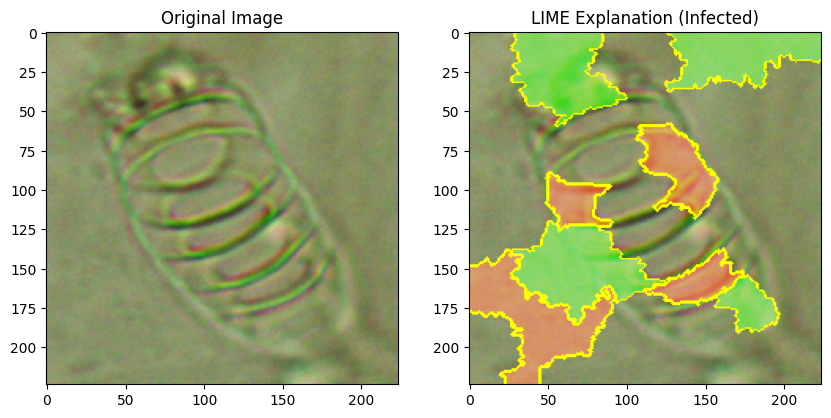

In [37]:
!pip install lime
import torch
from lime import lime_image
from skimage.segmentation import mark_boundaries
import torch
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms as transforms #import transforms module
import torchvision.models as models # Import torchvision.models

# Define device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load and preprocess the image
image_path = '/content/Genitalia_Balanced_Original_DATASET/Genitalia_Balanced/test/Ph_papatasi_female/377.jpg'
img = Image.open(image_path).convert('RGB')
img = img.resize((224, 224))  # Assuming your model expects 224x224 input
img_np = np.array(img)

# Define the transformation pipeline for
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to 224x224 for EfficientNetV2
    transforms.ToTensor(),  # Convert image to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize for ImageNet
])

# Load your pre-trained model (example using DenseNet201)
model = models.densenet201(pretrained=True)
# Assuming binary classification (infected vs non-infected)
num_classes = 2  # Replace with the actual number of classes in your task
model.classifier = torch.nn.Linear(in_features=model.classifier.in_features, out_features=num_classes)
model = model.to(device) # Move the model to the appropriate device


# Convert the image to a format the model can accept
input_tensor = transform(img).unsqueeze(0).to(device)

# Define a prediction function that returns model output probabilities
def predict_fn(images):
    # Convert images to tensors and pass through the model
    inputs = [transform(Image.fromarray(image)).unsqueeze(0).to(device) for image in images]
    inputs = torch.cat(inputs, dim=0)
    with torch.no_grad():
        outputs = model(inputs)  # Assuming your model variable is named `model`
    return outputs.cpu().numpy()

# Initialize LIME explainer
explainer = lime_image.LimeImageExplainer()

# Get LIME explanation
explanation = explainer.explain_instance(img_np,
                                         classifier_fn=predict_fn,
                                         top_labels=2,
                                         hide_color=0,
                                         num_samples=1000)

# Show explanation for class label 1 (infected)
temp, mask = explanation.get_image_and_mask(label=1, positive_only=False, num_features=10, hide_rest=False)

# Display the LIME result
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img_np)

plt.subplot(1, 2, 2)
plt.title('LIME Explanation (Infected)')
plt.imshow(mark_boundaries(temp, mask))

plt.show()

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet201_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet201_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


  0%|          | 0/1000 [00:00<?, ?it/s]

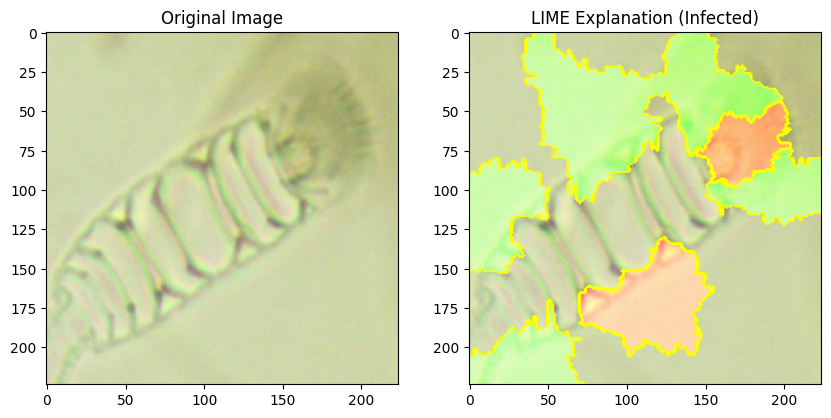

In [38]:
!pip install lime
import torch
from lime import lime_image
from skimage.segmentation import mark_boundaries
import torch
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms as transforms #import transforms module
import torchvision.models as models # Import torchvision.models

# Define device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load and preprocess the image
image_path = '/content/Genitalia_Balanced_Original_DATASET/Genitalia_Balanced/Ph_papatasi_female/195.jpg'
img = Image.open(image_path).convert('RGB')
img = img.resize((224, 224))  # Assuming your model expects 224x224 input
img_np = np.array(img)

# Define the transformation pipeline for
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to 224x224 for EfficientNetV2
    transforms.ToTensor(),  # Convert image to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize for ImageNet
])

# Load your pre-trained model (example using DenseNet201)
model = models.densenet201(pretrained=True)
# Assuming binary classification (infected vs non-infected)
num_classes = 2  # Replace with the actual number of classes in your task
model.classifier = torch.nn.Linear(in_features=model.classifier.in_features, out_features=num_classes)
model = model.to(device) # Move the model to the appropriate device


# Convert the image to a format the model can accept
input_tensor = transform(img).unsqueeze(0).to(device)

# Define a prediction function that returns model output probabilities
def predict_fn(images):
    # Convert images to tensors and pass through the model
    inputs = [transform(Image.fromarray(image)).unsqueeze(0).to(device) for image in images]
    inputs = torch.cat(inputs, dim=0)
    with torch.no_grad():
        outputs = model(inputs)  # Assuming your model variable is named `model`
    return outputs.cpu().numpy()

# Initialize LIME explainer
explainer = lime_image.LimeImageExplainer()

# Get LIME explanation
explanation = explainer.explain_instance(img_np,
                                         classifier_fn=predict_fn,
                                         top_labels=2,
                                         hide_color=0,
                                         num_samples=1000)

# Show explanation for class label 1 (infected)
temp, mask = explanation.get_image_and_mask(label=1, positive_only=False, num_features=10, hide_rest=False)

# Display the LIME result
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img_np)

plt.subplot(1, 2, 2)
plt.title('LIME Explanation (Infected)')
plt.imshow(mark_boundaries(temp, mask))

plt.show()